# Introduction to Time Series

Time series is a series of data points indexed based on time such as stock price, weather data, rainfall measurements, heart rate monitoring, sensor data and so on.    Generally, time space are equal but it can be change depend on your data and problem. Here are some of time series examples:

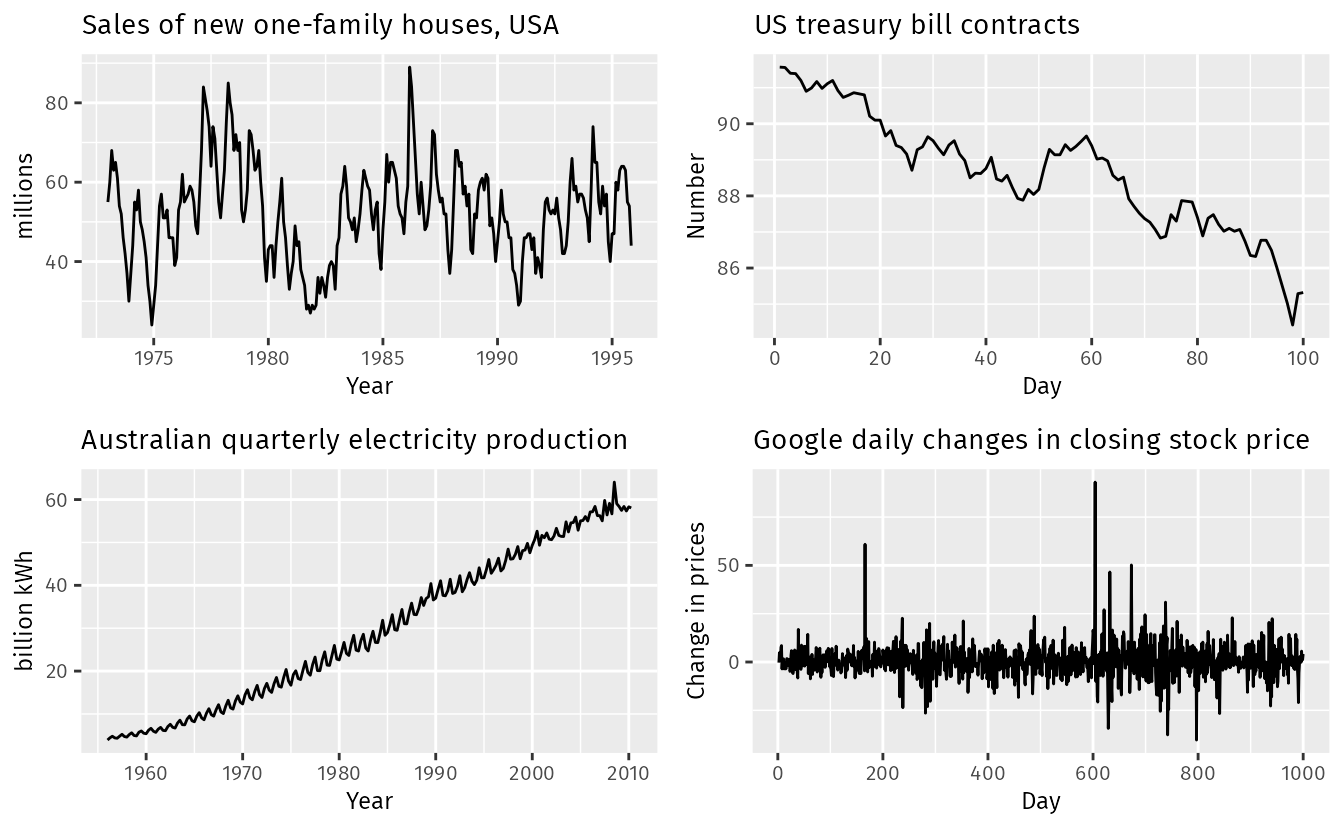


## Fundamentals of time series

### Stationary

Stationary series is a series that its statistical properties don't vary at the time. This statistical properties are mean, variance, covariance and standard deviation and not the function of time. Here is a series example of stationary and non-stationary series.

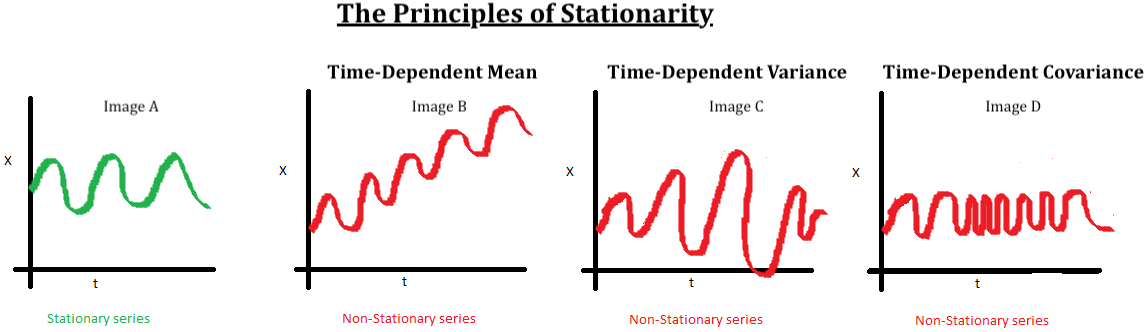

### Trend

Trend is a pattern in the data and show the movements in the long period. The movement direction might be on the up or down direction. In the below example, you can see the different type of trends such as linear, quadratic and cubic trends.

1. Linear trend: A linear trend represents a straight-line relationship between two variables. Equation of linear trends is `y=mx+b`
2. Quadratic trend: A quadratic trend represents a curved relationship between two variables. Equation of quadratic trends is `y=ax^2+bx+c`
3. Cubic trend: A cubic trend represents a more complex, S-shaped or curved relationship between two variables. Equation of cubic trends is `y=ax^3+bx^2+cx+d`

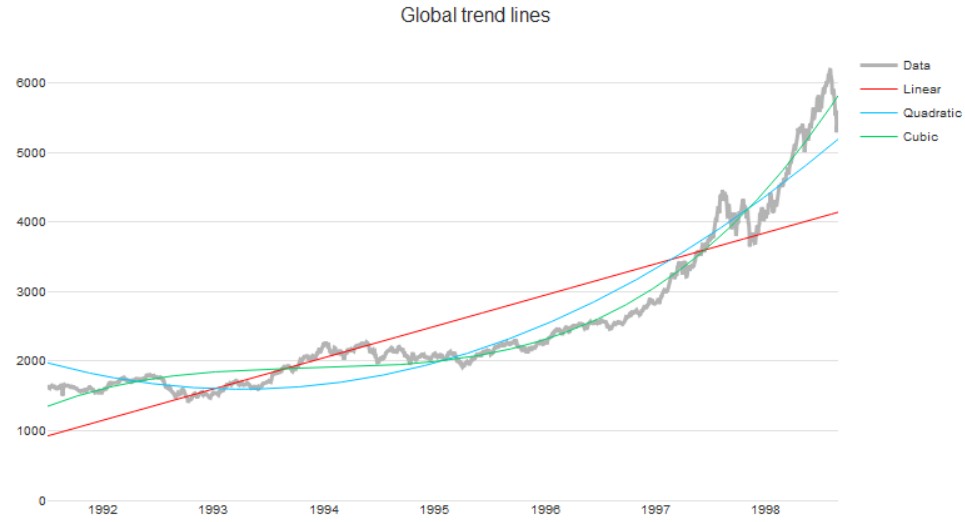

### Seasonality

Seasonality refers to a patern of data points that occurs at regular intervals time. This regular time can be days, weeks, months or seasons.

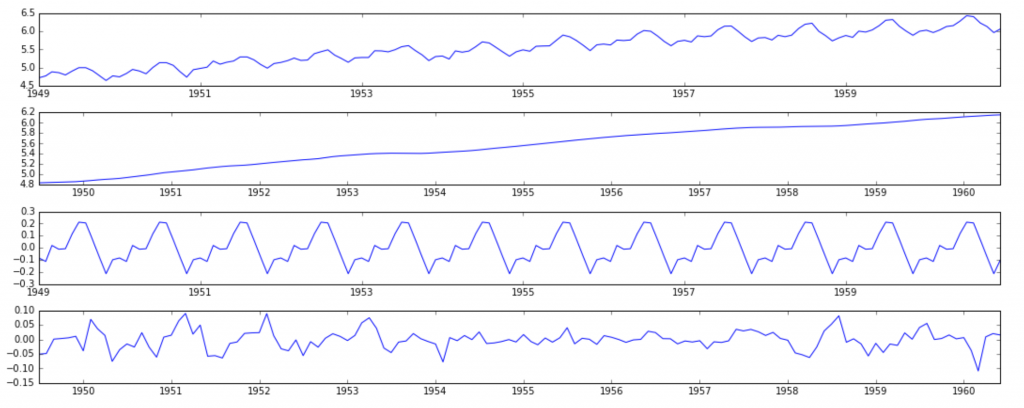

### Cycle

Cycle is a repeating pattern in the data that occurs over a fixed period of time. These cycles can be of varying lengths and are often associated with economic, environmental, or other natural phenomena.

### Moving Average

The future value of time series is average of k previous values. The formula of the moving average:

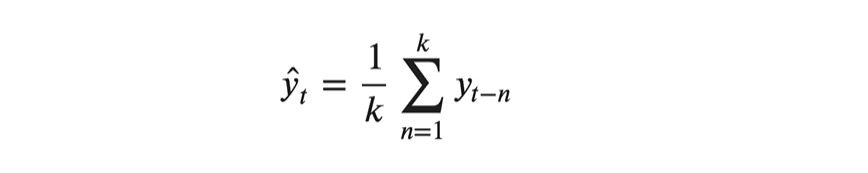

In the below graph, we compared the actual and moving average values for window size 4. (k=4)

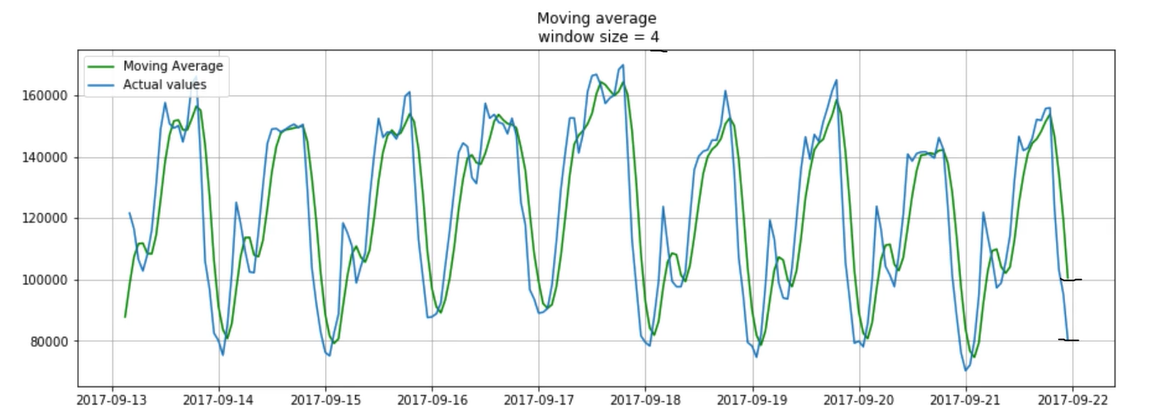

Let's increase the window size to 12 and see what happens..

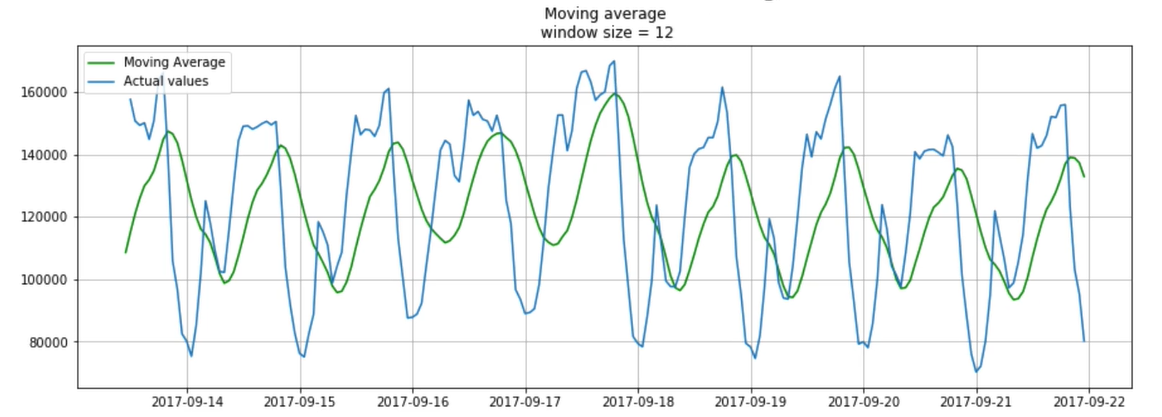

It looks like increasing the window size doesn't give us better results. Our moving average values are far from the actual values according to before window size.

### Weighted Average

Weighted average looks like moving average however there is a little difference that we give more weight for last data points for better prediction.

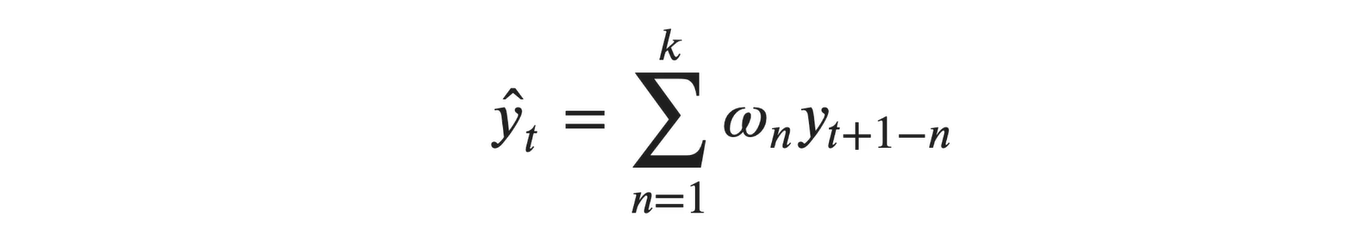

### Comparing weighted average and moving average

I just want to explain this two concept with a basic example. In the below table, there are 4 data points and their values and time information. And let's make some prediction for fifth data points based on both moving and weighted average.

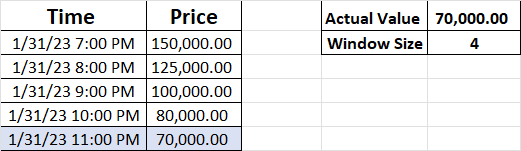

In [ ]:
# Define actual value, n_sample(k)
n_samples = 4
actual_value = 70000

In [ ]:
# Calculate the moving average
moving_average = (150000 + 125000 + 100000 + 80000) / n_samples
moving_average

113750.0

In [ ]:
# Difference between actual value and moving averaege prediction
moving_average - actual_value

43750.0

In [ ]:
# Define the weights for weighted average
w1 = 0.1
w2 = 0.1
w3 = 0.2
w4 = 0.6   # sum of all weights should be 1..

In [ ]:
# Calculate the weighted average
weighted_average = (w1*150000 + w2*125000 + w3*100000 + w4*80000)
weighted_average

95500.0

In [ ]:
# Difference between actual value and weighted averaga
weighted_average - actual_value

25500.0

As you see the results, we made better prediction with weighted average. But not that the all weights of weighted average should be 1. Otherwise our calculation will be wrong.

## Smoothing Methods (Holt-Winters)

Smoothing in the time series analysis is reducing or removing the noise from the data for reveal trendings, patterns or seasonal variations. Main purpose of the smoothing is the make easier to analysis of data and modelling.

In this section we will discover 3 different type of smoothing methods:

1. Single Exponential Smoothing (SES)
2. Double Exponential Smoothing (DES)
3. Trible Exponential Smoothing (TES)

### Single Exponential Smoothing (SES)

Single exponential smoothing, also known as simple exponential smoothing, is to give more weight to recent observations while forecasting future values. This method is useful when dealing with stationary series mean that no trends and seasonality.

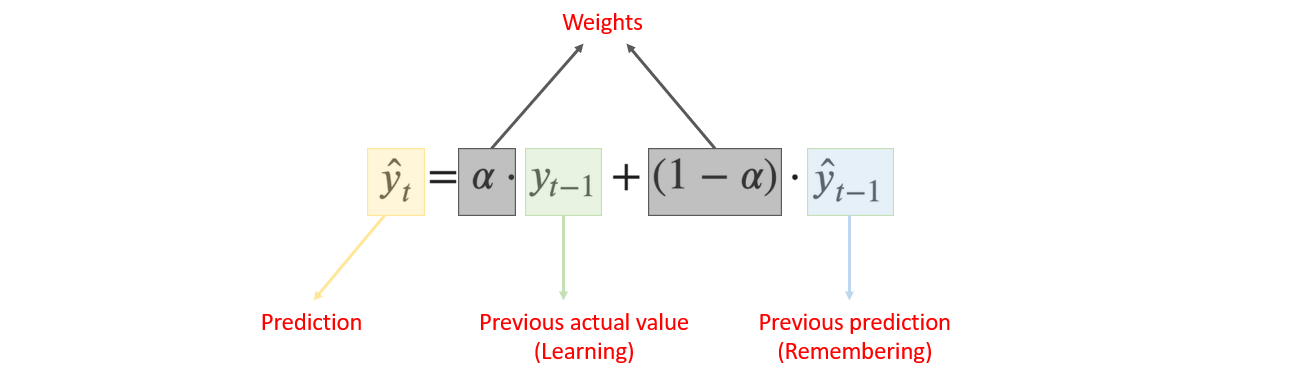

As you see the above formula, there are two main part. First one is the learning part that includes information about actual values and the second part is remembering part that includes the previous predictions. Actually, the most important point in the formula is the weights (a value) because how much weight we want to give each part plays key role to results. Let's look an example for a=0.3 and a=0.05.

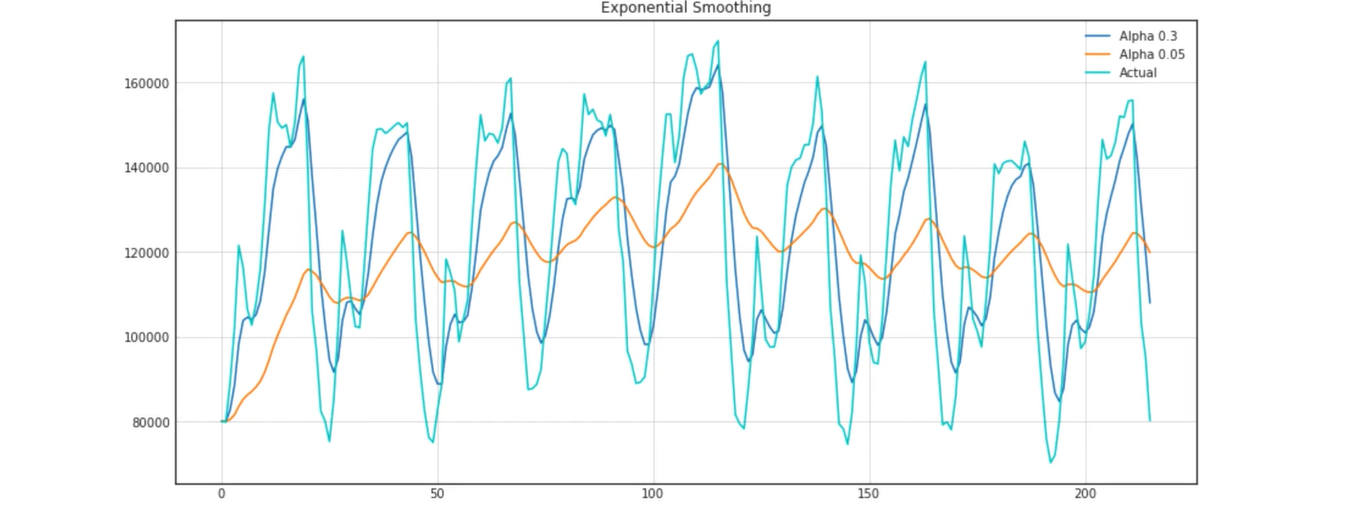

In this example, alpha=0.3 is giving better results. It means that giving more weights to learning part (previous actual values) is more important. However note that it is not a rule and depends on your problem and data.

### Let's make an example with SES

In [ ]:
# Import Libraries
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings('ignore')

Dataset: Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Huwai, USA.

Period of Record: March 1958 - December 2001

In [ ]:
# Load data
data = sm.datasets.co2.load_pandas()
y = data.data

# Check the data
y

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


We have weekly data but we want to work monthly data so let's convert weekly data into montly format. To do this we will get the mean of the 4 weeks values for each month.

In [ ]:
# Convert weekly data into monthly format
y = y.resample('MS').mean()
y

,co2
1958-03-01,316.100000
1958-04-01,317.200000
1958-05-01,317.433333
1958-06-01,NaN
1958-07-01,315.625000
...,...
2001-08-01,369.425000
2001-09-01,367.880000
2001-10-01,368.050000
2001-11-01,369.375000


In [ ]:
# Check the missing values
y.isnull().sum()

co2    5
dtype: int64

There are 5 missing value in the data. We can fill missing row with the its before or after value or average of them for the time series forecasting problems.

In [ ]:
# Fill the missing value with before values
y = y.fillna(y.bfill())

In [ ]:
# Check the missing values again
y.isnull().sum()

co2    0
dtype: int64

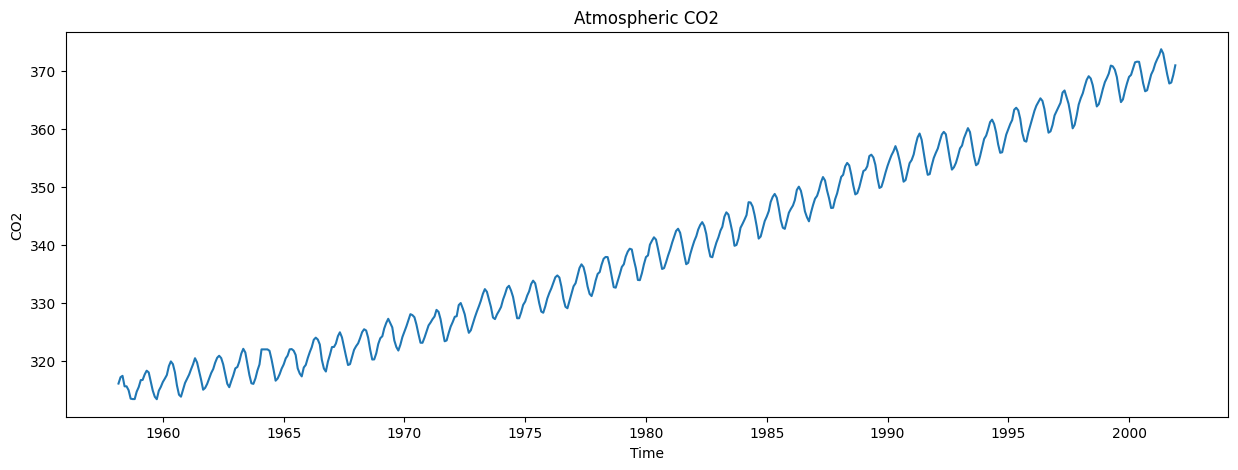

In [ ]:
# Plot the data
plt.figure(figsize=(15, 5))
plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('Atmospheric CO2')
plt.plot(y);

At first sight, we can say that there are positive trend and seasonality in the data. Let's start modelling data but before we should split our data into train and test set and fo some structural analysis.

In [ ]:
# Train data
train = y[:'1997-12-01']
print(f'Length of training data (total months) is: {len(train)}')

Length of training data (total months) is: 478


In [ ]:
# Test data
test = y['1998-01-01':]
print(f'Length of test data (total months) is: {len(test)}')

Length of test data (total months) is: 48


In [ ]:
# Structural Analysis - Stationary Test (Dicker-Fuller Test)
def is_stationary(data):
  # H0: Non-stationary
  # H1: Stationary

  p_value = sm.tsa.stattools.adfuller(data)[1]
  if p_value < 0.05:
    print(f'Result: Stationary, p_value: {round(p_value, 3)}')
  else:
    print(f'Result: Non-Stationary, p_value: {round(p_value, 3)}')

# Check the our data stationary
is_stationary(y)

Result: Non-Stationary, p_value: 0.999


In [ ]:
# Let's look another function that calculate and plot the time series components and stationary test
def ts_decompose(data, model='additive', stationary=False):
  result = seasonal_decompose(data, model=model)
  fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
  fig.set_figheight(10)
  fig.set_figwidth(15)

  axes[0].set_title('Decomposition for ' + model + ' model')
  axes[0].plot(data, 'k', label='Original ' + model)
  axes[0].legend(loc='upper left')

  axes[1].plot(result.trend, label='Trend')
  axes[1].legend(loc='upper left')

  axes[2].plot(result.seasonal, 'g', label='Seasonality & Mean: ' + str(round(result.seasonal.mean(), 4)))
  axes[2].legend(loc='upper left')

  axes[3].plot(result.resid, 'r', label='Residuals & Mean: ' + str(round(result.resid.mean(), 4)))
  axes[3].legend(loc='upper left')
  plt.show()

  if stationary:
    print('\n')
    is_stationary(data)

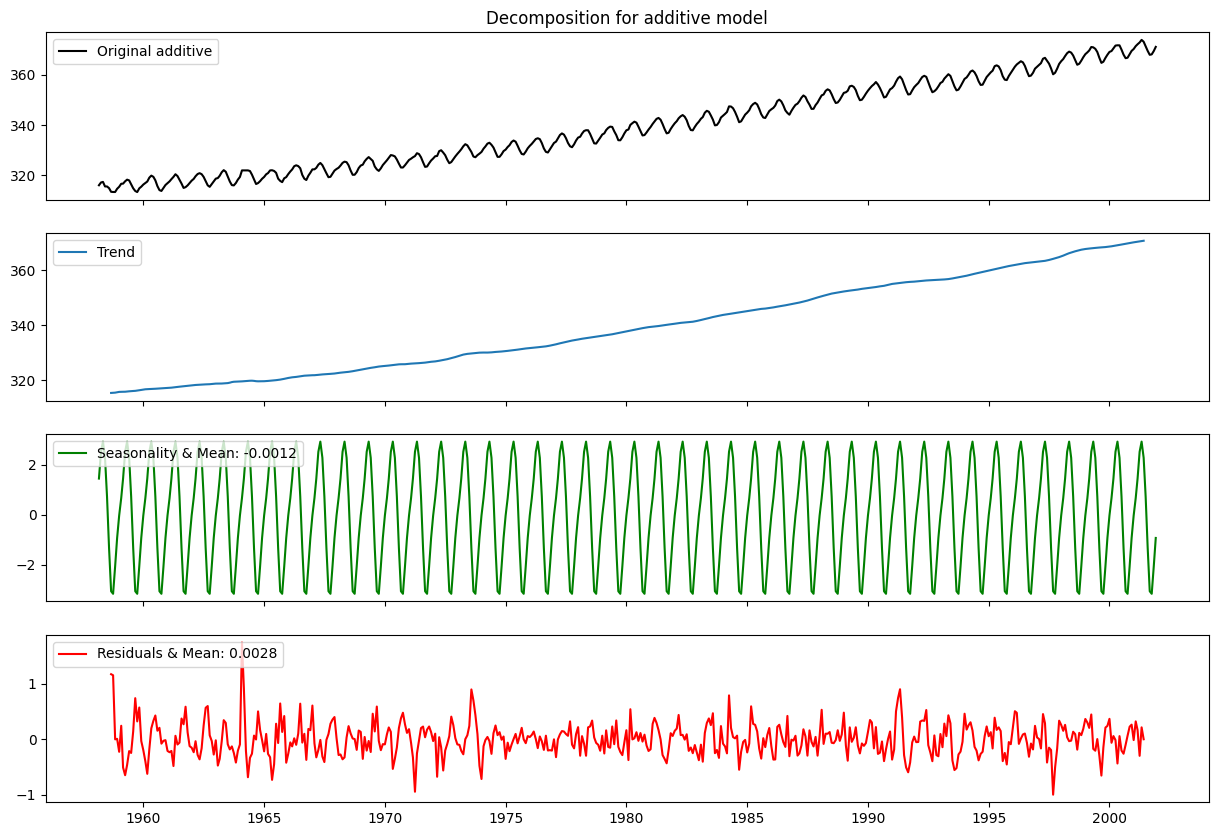



Result: Non-Stationary, p_value: 0.999


In [ ]:
# Check the components of data and stationary test
ts_decompose(y, stationary=True)

Now, we divided our data and analyzed data structure so we got these results:

1. No stationary
2. There are positive trend and seasonality

By the way, we wait residuals of time series around zero as our results above.

If we look at the results, we can say that single exponential smoothing method is not useful for our problem. Because SES is conveninet when the data is stationary. Nevertheless, we will use this model and evaluate the results.

In [ ]:
# Create single exponential model
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.5) # smoothing_level is alpha or also known as weight

In [ ]:
# Make some prediction with SES model
y_pred_ses = ses_model.forecast(len(test)) # We have 48 test data so we are waiting for 48 predictions
                                                # Thats why we add length of test data in the forecast as parameter
y_pred_ses

1998-01-01    363.057044
1998-02-01    363.057044
1998-03-01    363.057044
1998-04-01    363.057044
1998-05-01    363.057044
1998-06-01    363.057044
1998-07-01    363.057044
1998-08-01    363.057044
1998-09-01    363.057044
1998-10-01    363.057044
1998-11-01    363.057044
1998-12-01    363.057044
1999-01-01    363.057044
1999-02-01    363.057044
1999-03-01    363.057044
1999-04-01    363.057044
1999-05-01    363.057044
1999-06-01    363.057044
1999-07-01    363.057044
1999-08-01    363.057044
1999-09-01    363.057044
1999-10-01    363.057044
1999-11-01    363.057044
1999-12-01    363.057044
2000-01-01    363.057044
2000-02-01    363.057044
2000-03-01    363.057044
2000-04-01    363.057044
2000-05-01    363.057044
2000-06-01    363.057044
2000-07-01    363.057044
2000-08-01    363.057044
2000-09-01    363.057044
2000-10-01    363.057044
2000-11-01    363.057044
2000-12-01    363.057044
2001-01-01    363.057044
2001-02-01    363.057044
2001-03-01    363.057044
2001-04-01    363.057044


Predictions look very interesting.. As I said before, SES model is useful when there is stationary in the data, that's why all results are same and we made poor predictions.

In [ ]:
# Lets evaluate our results with mean absolute error
ses_mae = mean_absolute_error(test, y_pred_ses)
ses_mae

5.706393369643809

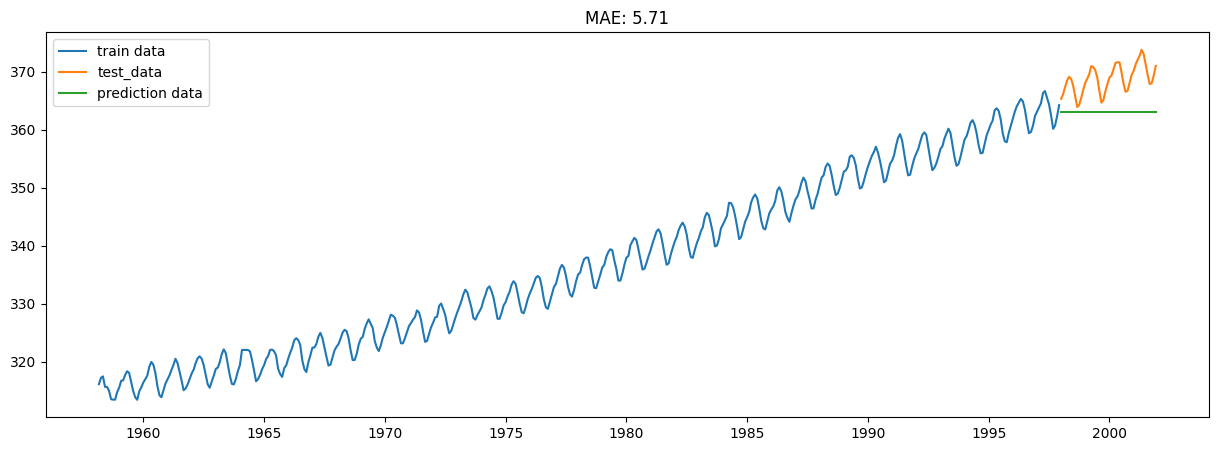

In [ ]:
# Create a plot function and plot our results
def plot_predictions(train_data, test_data, y_pred_data, mae):
  plt.figure(figsize=(15, 5))
  plt.plot(train_data, label='train data')
  plt.plot(test_data, label='test_data')
  plt.plot(y_pred_data, label='prediction data')
  plt.title(f'MAE: {round(mae, 2)}')
  plt.legend()
  plt.show()

plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_ses,
                 mae=ses_mae)

In [ ]:
# Let's look the model parameters
ses_model.params

{'smoothing_level': 0.5,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 316.1,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

We added alpha=0.5 parameter in the model but is this parameter's value is best? What about the alpha=0.3 or alpha=0.7? To get better results, we should try all the different alpha values. However it is not easy try it manually so we will use hyperparameter optimization. Hyperparameter optimization is best way to find the best parameters for our model and get better results. Let's do that for SES model.

In [ ]:
# Create a optization function for single exponential smoothing
def ses_optimizer(train, alphas, len_forecast=48):
  best_alpha, best_mae = None, float('inf')
  for alpha in alphas:
    ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
    y_pred = ses_model.forecast(len_forecast)
    mae = mean_absolute_error(test, y_pred)
    if mae < best_mae:
      best_alpha, best_mae = alpha, mae
    print('alpha:', round(alpha, 2), 'mae:', round(mae, 4))

  print('best_alpha:', round(best_alpha, 2), 'best_mae:', round(best_mae, 4))
  return best_alpha, best_mae

In [ ]:
# Create an alpha array for finding best parameters
alphas = np.arange(0.8, 1, 0.01)

In [ ]:
# Hyperparameter optmization
best_alpha, best_mae = ses_optimizer(train=train, alphas=alphas, len_forecast=len(test))

alpha: 0.8 mae: 4.953
alpha: 0.81 mae: 4.9282
alpha: 0.82 mae: 4.9035
alpha: 0.83 mae: 4.8792
alpha: 0.84 mae: 4.8551
alpha: 0.85 mae: 4.8316
alpha: 0.86 mae: 4.8091
alpha: 0.87 mae: 4.7869
alpha: 0.88 mae: 4.765
alpha: 0.89 mae: 4.7434
alpha: 0.9 mae: 4.7221
alpha: 0.91 mae: 4.7012
alpha: 0.92 mae: 4.6805
alpha: 0.93 mae: 4.6602
alpha: 0.94 mae: 4.6402
alpha: 0.95 mae: 4.6205
alpha: 0.96 mae: 4.6012
alpha: 0.97 mae: 4.5822
alpha: 0.98 mae: 4.5634
alpha: 0.99 mae: 4.5451
best_alpha: 0.99 best_mae: 4.5451


We got the best parameter for alpha. Now, its time to create dinal model with best alpha parameter, plot results and evaluate them.

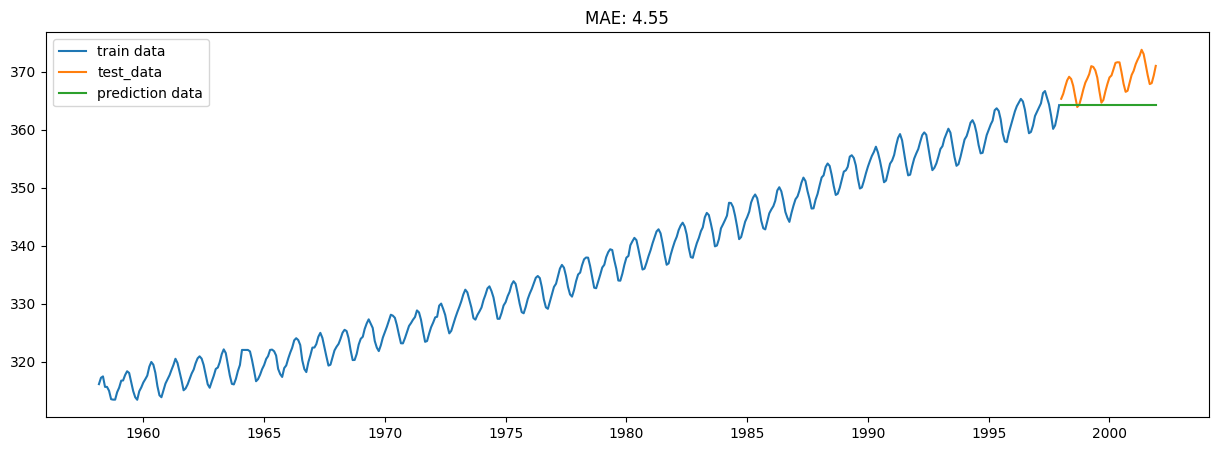

In [ ]:
# Final model and evaluate them
final_ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred_ses_final = final_ses_model.forecast(len(test))
final_ses_mae = mean_absolute_error(test, y_pred_ses_final)

# Plot the results
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_ses_final,
                 mae=final_ses_mae)

Hmmm. I think we still have poor results because we didn't modelling our data with the suitable model.. Let's continue another section is Double Exponential Smoothing Method.

### Double Exponential Smoothing (DES)

Basically, double exponential smoothing is an extension of single exponential smoothing. DES models consider the trends in addion to SES models and might be very useful when dealing with time series data that exibit both level and trend.

`DES = SES + Trend`

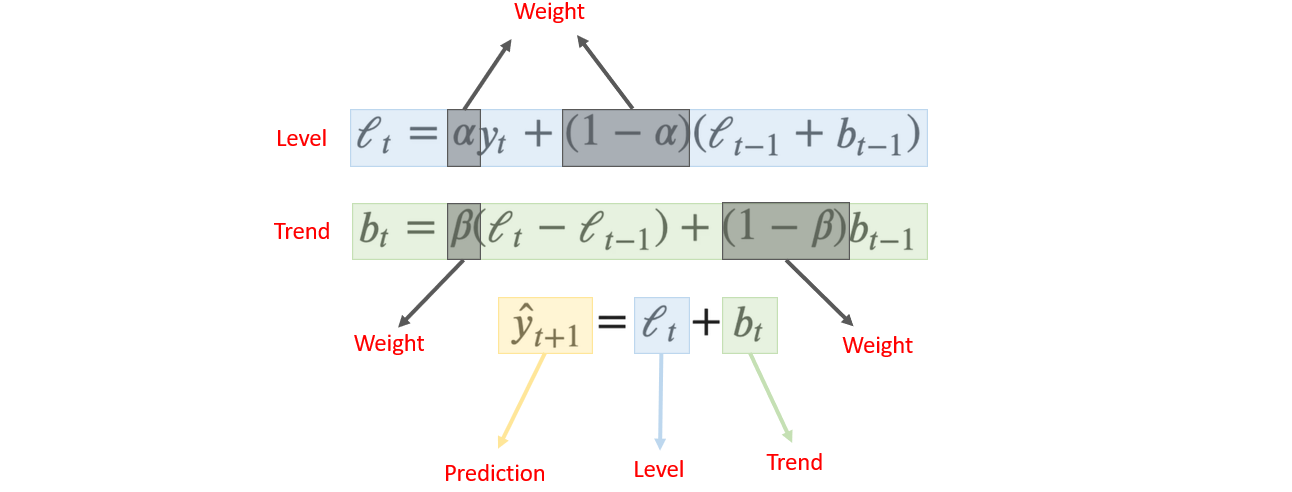

### Let's modelling our data with DES

In [ ]:
# Create the double exponential smoothing model
des_model = ExponentialSmoothing(train, trend='add').fit(smoothing_level=0.5,
                                                         smoothing_trend=0.5)

There are two main hyperparameter for our model one of them is smoothing level and the other smoothing trend as you can see from the formula. But what about the `trend='add'`? What is that and what does it mean?

In the time series model basically, there are two main model concepts. These are additive and multiplicative models. Below are the this model concepts:

* Additive model: `y(t) = Level + Trend + Seasonality + Noice`
* Multiplicative model: `y(t) = Level x Trend x Seasonality x Noice`

In an additive model, these components (level, trend, noice, etc) are added together, making it suitable for time series where the effects of trend and seasonality remain relatively constant over time.

In a multiplicative model, these components are multiplied together, making it suitable for time series where the relative importance of trend and seasonality changes with time.

In [ ]:
# Make prediction with des model
y_pred_des = des_model.forecast(len(test))
y_pred_des

1998-01-01    362.566380
1998-02-01    363.023579
1998-03-01    363.480777
1998-04-01    363.937976
1998-05-01    364.395175
1998-06-01    364.852373
1998-07-01    365.309572
1998-08-01    365.766771
1998-09-01    366.223970
1998-10-01    366.681168
1998-11-01    367.138367
1998-12-01    367.595566
1999-01-01    368.052765
1999-02-01    368.509963
1999-03-01    368.967162
1999-04-01    369.424361
1999-05-01    369.881560
1999-06-01    370.338758
1999-07-01    370.795957
1999-08-01    371.253156
1999-09-01    371.710355
1999-10-01    372.167553
1999-11-01    372.624752
1999-12-01    373.081951
2000-01-01    373.539150
2000-02-01    373.996348
2000-03-01    374.453547
2000-04-01    374.910746
2000-05-01    375.367944
2000-06-01    375.825143
2000-07-01    376.282342
2000-08-01    376.739541
2000-09-01    377.196739
2000-10-01    377.653938
2000-11-01    378.111137
2000-12-01    378.568336
2001-01-01    379.025534
2001-02-01    379.482733
2001-03-01    379.939932
2001-04-01    380.397131


In [ ]:
# Calculate the mean absolute error for des model
des_mae = mean_absolute_error(y_true=test,
                              y_pred=y_pred_des)
des_mae

5.751835862592146

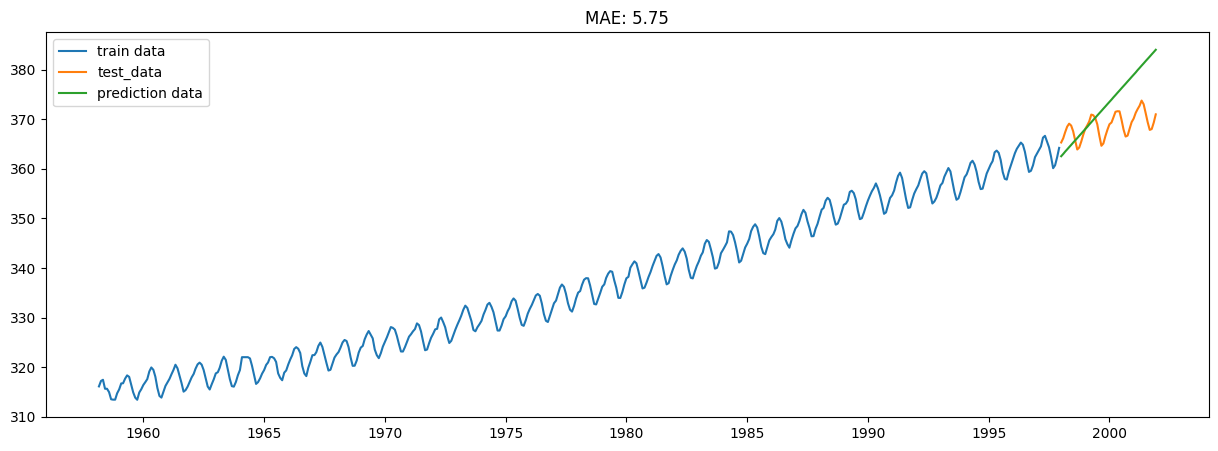

In [ ]:
# Plot the prediction
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_des,
                 mae=des_mae)

In [ ]:
# Create a function for hyperparameter optimization
def des_optimizer(train, alphas, betas, len_forecast=48):
  best_alpha, best_beta, best_mae = None, None, float('inf')
  for alpha in alphas:
    for beta in betas:
      des_model = ExponentialSmoothing(train, trend='add').fit(smoothing_level=alpha,
                                                               smoothing_trend=beta)
      y_pred = des_model.forecast(len_forecast)
      mae = mean_absolute_error(test, y_pred)
      if mae < best_mae:
        best_alpha, best_beta, best_mae = alpha, beta, mae
      print('alpha:', round(alpha, 2), 'beta:', round(beta, 2), 'mae:', round(mae, 4))

  print('best_alpha:', round(best_alpha, 2), 'best_beta:', round(best_beta, 2), 'best_mae:', round(best_mae, 5))
  return best_alpha, best_beta, best_mae

In [ ]:
# Create beta and alpha arrays for hyperparemeter optimization
alphas = np.arange(0.01, 1, 0.1)
betas = np.arange(0.01, 1, 0.1)

print('Alphas:', alphas)
print('Betas:', betas)

Alphas: [0.01 0.11 0.21 0.31 0.41 0.51 0.61 0.71 0.81 0.91]
Betas: [0.01 0.11 0.21 0.31 0.41 0.51 0.61 0.71 0.81 0.91]


In [ ]:
best_alpha, best_beta, best_mae = des_optimizer(train=train,
                                                alphas=alphas,
                                                betas=betas,
                                                len_forecast=len(test))

alpha: 0.01 beta: 0.01 mae: 2.3849
alpha: 0.01 beta: 0.11 mae: 2.8294
alpha: 0.01 beta: 0.21 mae: 2.744
alpha: 0.01 beta: 0.31 mae: 2.1723
alpha: 0.01 beta: 0.41 mae: 2.8895
alpha: 0.01 beta: 0.51 mae: 2.49
alpha: 0.01 beta: 0.61 mae: 1.8196
alpha: 0.01 beta: 0.71 mae: 1.7411
alpha: 0.01 beta: 0.81 mae: 2.1932
alpha: 0.01 beta: 0.91 mae: 4.8521
alpha: 0.11 beta: 0.01 mae: 2.4334
alpha: 0.11 beta: 0.11 mae: 3.9118
alpha: 0.11 beta: 0.21 mae: 6.0908
alpha: 0.11 beta: 0.31 mae: 7.2434
alpha: 0.11 beta: 0.41 mae: 8.7305
alpha: 0.11 beta: 0.51 mae: 10.3166
alpha: 0.11 beta: 0.61 mae: 12.0066
alpha: 0.11 beta: 0.71 mae: 13.9772
alpha: 0.11 beta: 0.81 mae: 16.4873
alpha: 0.11 beta: 0.91 mae: 19.655
alpha: 0.21 beta: 0.01 mae: 2.8218
alpha: 0.21 beta: 0.11 mae: 5.7217
alpha: 0.21 beta: 0.21 mae: 8.6538
alpha: 0.21 beta: 0.31 mae: 11.7598
alpha: 0.21 beta: 0.41 mae: 15.5277
alpha: 0.21 beta: 0.51 mae: 20.1474
alpha: 0.21 beta: 0.61 mae: 25.5273
alpha: 0.21 beta: 0.71 mae: 31.2781
alpha: 0.21 be

In [ ]:
# Create final des model
final_des_model = ExponentialSmoothing(train, trend='add').fit(smoothing_level=best_alpha,
                                                               smoothing_trend=best_beta)

In [ ]:
# Make some prediction with final des model
y_pred_des_final = final_des_model.forecast(len(test))

In [ ]:
# Lets look at the mean absolute error for des model
final_des_mae = mean_absolute_error(y_true=test,
                                    y_pred=y_pred_des_final)

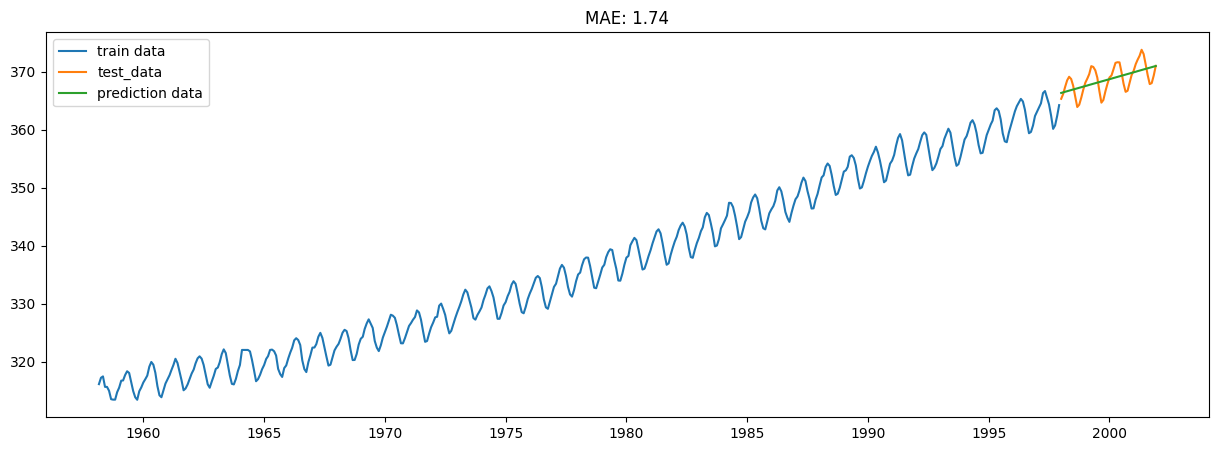

In [ ]:
# Lets plot and evaluate our model results
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_des_final,
                 mae=final_des_mae)

### Trible Exponential Smoothing (Holt-Winters)

Trible exponential smoothing also known as holt-winters method is an advanced time series forecasting method that extension of the double exponential smoothing. In this method, level(SES), trend and seasonality are using for forecasting. This method is most advanced method in the smoothing techniques and very useful with time series data that exhibit level, trend and seasonality.

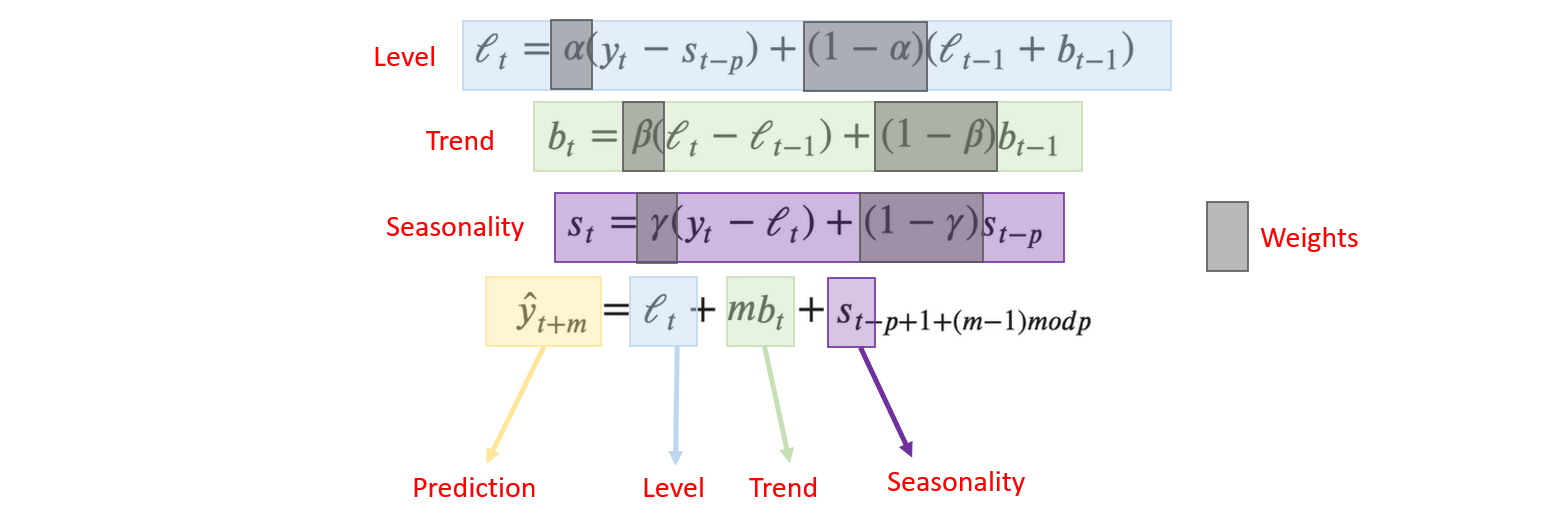

### Let's create another model with TES

In [ ]:
# Create a trible exponential smoothing model (tes)
tes_model = ExponentialSmoothing(train,
                                 trend='add',
                                 seasonal='add',
                                 seasonal_periods=12).fit(smoothing_level=0.5,
                                                          smoothing_slope=0.5,
                                                          smoothing_seasonal=0.5) # Seasonal periods 12 because our data is monthly

In [ ]:
# Make prediction with tes_model
y_pred_tes = tes_model.forecast(len(test))
y_pred_tes

1998-01-01    365.409896
1998-02-01    366.651705
1998-03-01    367.673270
1998-04-01    369.268391
1998-05-01    369.701159
1998-06-01    369.042214
1998-07-01    368.247902
1998-08-01    366.361761
1998-09-01    364.327204
1998-10-01    364.980170
1998-11-01    366.566509
1998-12-01    368.294903
1999-01-01    369.549203
1999-02-01    370.791012
1999-03-01    371.812578
1999-04-01    373.407698
1999-05-01    373.840466
1999-06-01    373.181522
1999-07-01    372.387209
1999-08-01    370.501069
1999-09-01    368.466511
1999-10-01    369.119477
1999-11-01    370.705816
1999-12-01    372.434210
2000-01-01    373.688510
2000-02-01    374.930319
2000-03-01    375.951885
2000-04-01    377.547005
2000-05-01    377.979774
2000-06-01    377.320829
2000-07-01    376.526516
2000-08-01    374.640376
2000-09-01    372.605819
2000-10-01    373.258784
2000-11-01    374.845124
2000-12-01    376.573517
2001-01-01    377.827818
2001-02-01    379.069626
2001-03-01    380.091192
2001-04-01    381.686312


In [ ]:
# Calculate the mean absolute error for tes model
tes_model_mae = mean_absolute_error(test, y_pred_tes)
tes_model_mae

4.65594699301139

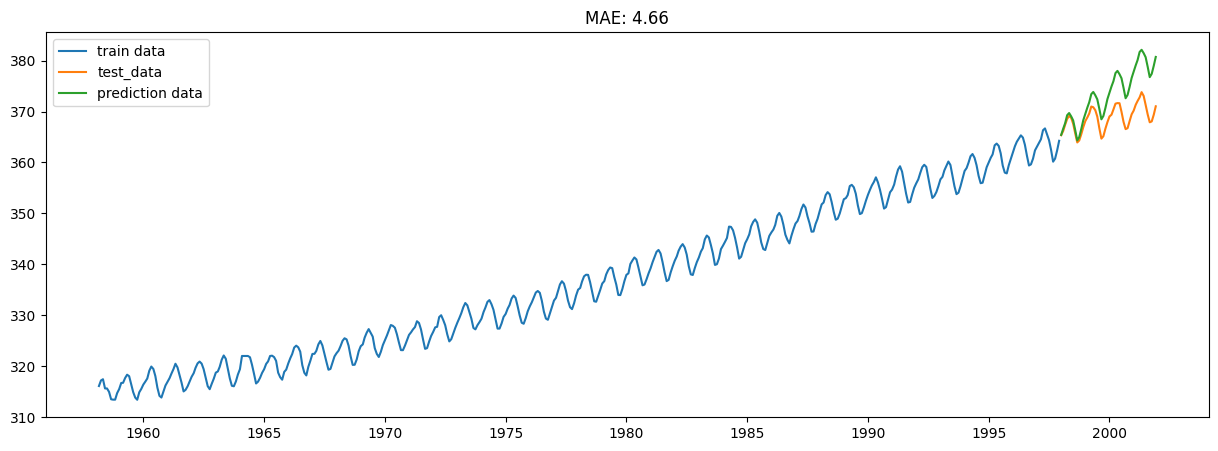

In [ ]:
# Plot the results
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_tes,
                 mae=tes_model_mae)

Woww. It looks really cool and you can see that the model have catched the seasonality and trend. By the way, note that we didn't hyperparameter optmization yet. Let's make it and see the results.

In [ ]:
# Create arrays for hyperparameter optimization
alphas = betas = gammas = np.arange(0.2, 1, 0.1)

print('Alphas:', alphas)
print('Betas:', betas)
print('Gammas:', gammas)

Alphas: [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Betas: [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Gammas: [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [ ]:
# Create tuples for all possible combination of alphas, betas and gammas
abg = list(itertools.product(alphas, betas, gammas))
abg

[(0.2, 0.2, 0.2),
 (0.2, 0.2, 0.30000000000000004),
 (0.2, 0.2, 0.4000000000000001),
 (0.2, 0.2, 0.5000000000000001),
 (0.2, 0.2, 0.6000000000000001),
 (0.2, 0.2, 0.7000000000000002),
 (0.2, 0.2, 0.8000000000000003),
 (0.2, 0.2, 0.9000000000000001),
 (0.2, 0.30000000000000004, 0.2),
 (0.2, 0.30000000000000004, 0.30000000000000004),
 (0.2, 0.30000000000000004, 0.4000000000000001),
 (0.2, 0.30000000000000004, 0.5000000000000001),
 (0.2, 0.30000000000000004, 0.6000000000000001),
 (0.2, 0.30000000000000004, 0.7000000000000002),
 (0.2, 0.30000000000000004, 0.8000000000000003),
 (0.2, 0.30000000000000004, 0.9000000000000001),
 (0.2, 0.4000000000000001, 0.2),
 (0.2, 0.4000000000000001, 0.30000000000000004),
 (0.2, 0.4000000000000001, 0.4000000000000001),
 (0.2, 0.4000000000000001, 0.5000000000000001),
 (0.2, 0.4000000000000001, 0.6000000000000001),
 (0.2, 0.4000000000000001, 0.7000000000000002),
 (0.2, 0.4000000000000001, 0.8000000000000003),
 (0.2, 0.4000000000000001, 0.9000000000000001),
 (

In [ ]:
# Create a function that hyperparameter optimization for tes model
def tes_optimizer(train, abg, len_forecast=48):
  best_alpha, best_beta, best_gamma, best_mae = None, None, None, float('inf')
  for comb in abg:
    tes_model = ExponentialSmoothing(train,
                                     trend='add',
                                     seasonal='add',
                                     seasonal_periods=12).fit(smoothing_level=comb[0],
                                                              smoothing_slope=comb[1],
                                                              smoothing_seasonal=comb[2])
    y_pred = tes_model.forecast(len_forecast)
    mae = mean_absolute_error(test, y_pred)

    if mae < best_mae:
      best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
    print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

  print('best_alpha:', round(best_alpha, 2), 'best_beta:', round(best_beta, 2),
        'best_gamma:', round(best_gamma, 2), 'best_mae:', round(best_mae, 2))

  return best_alpha, best_beta, best_gamma, best_mae

In [ ]:
# Let's run our tes optimizer function and get the best parameters for tes model
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train=train,
                                                            abg=abg,
                                                            len_forecast=len(test))

[0.2, 0.2, 0.2, 0.88]
[0.2, 0.2, 0.3, 0.79]
[0.2, 0.2, 0.4, 0.76]
[0.2, 0.2, 0.5, 0.75]
[0.2, 0.2, 0.6, 0.72]
[0.2, 0.2, 0.7, 0.67]
[0.2, 0.2, 0.8, 0.67]
[0.2, 0.2, 0.9, 0.71]
[0.2, 0.3, 0.2, 0.86]
[0.2, 0.3, 0.3, 0.93]
[0.2, 0.3, 0.4, 0.94]
[0.2, 0.3, 0.5, 0.95]
[0.2, 0.3, 0.6, 1.09]
[0.2, 0.3, 0.7, 1.43]
[0.2, 0.3, 0.8, 1.95]
[0.2, 0.3, 0.9, 1.73]
[0.2, 0.4, 0.2, 1.63]
[0.2, 0.4, 0.3, 1.74]
[0.2, 0.4, 0.4, 1.64]
[0.2, 0.4, 0.5, 1.68]
[0.2, 0.4, 0.6, 2.3]
[0.2, 0.4, 0.7, 4.39]
[0.2, 0.4, 0.8, 11.66]
[0.2, 0.4, 0.9, 4.52]
[0.2, 0.5, 0.2, 2.46]
[0.2, 0.5, 0.3, 2.52]
[0.2, 0.5, 0.4, 1.94]
[0.2, 0.5, 0.5, 1.82]
[0.2, 0.5, 0.6, 1.84]
[0.2, 0.5, 0.7, 3.35]
[0.2, 0.5, 0.8, 4.63]
[0.2, 0.5, 0.9, 3.99]
[0.2, 0.6, 0.2, 3.37]
[0.2, 0.6, 0.3, 3.11]
[0.2, 0.6, 0.4, 0.72]
[0.2, 0.6, 0.5, 1.08]
[0.2, 0.6, 0.6, 1.64]
[0.2, 0.6, 0.7, 2.68]
[0.2, 0.6, 0.8, 8327.83]
[0.2, 0.6, 0.9, 151797145264.8]
[0.2, 0.7, 0.2, 4.72]
[0.2, 0.7, 0.3, 4.56]
[0.2, 0.7, 0.4, 6.58]
[0.2, 0.7, 0.5, 0.64]
[0.2, 0.7, 0.6, 1.9

In [ ]:
# Create the final model
final_tes_model =  ExponentialSmoothing(train,
                                        trend='add',
                                        seasonal='add',
                                        seasonal_periods=12).fit(smoothing_level=best_alpha,
                                                                  smoothing_slope=best_beta,
                                                                  smoothing_seasonal=best_gamma)

In [ ]:
# Make prediction with best parameters
y_pred_final_tes = final_tes_model.forecast(len(test))
y_pred_final_tes

1998-01-01    365.285916
1998-02-01    365.984708
1998-03-01    366.588735
1998-04-01    368.468945
1998-05-01    368.350792
1998-06-01    367.686023
1998-07-01    366.803832
1998-08-01    364.728357
1998-09-01    362.426187
1998-10-01    363.130258
1998-11-01    364.294105
1998-12-01    366.327536
1999-01-01    367.205726
1999-02-01    367.904518
1999-03-01    368.508545
1999-04-01    370.388755
1999-05-01    370.270601
1999-06-01    369.605832
1999-07-01    368.723641
1999-08-01    366.648167
1999-09-01    364.345996
1999-10-01    365.050068
1999-11-01    366.213915
1999-12-01    368.247345
2000-01-01    369.125535
2000-02-01    369.824327
2000-03-01    370.428354
2000-04-01    372.308564
2000-05-01    372.190411
2000-06-01    371.525642
2000-07-01    370.643451
2000-08-01    368.567976
2000-09-01    366.265806
2000-10-01    366.969877
2000-11-01    368.133725
2000-12-01    370.167155
2001-01-01    371.045345
2001-02-01    371.744137
2001-03-01    372.348164
2001-04-01    374.228374


In [ ]:
# Calculate the mean absolute error
tes_final_model_mae = mean_absolute_error(test, y_pred_final_tes)
tes_final_model_mae

0.6059927585077235

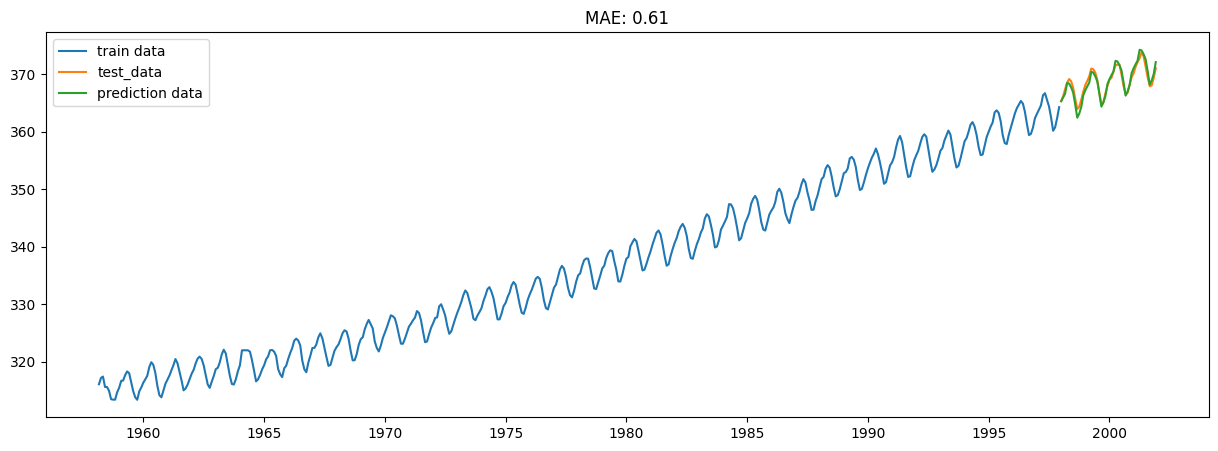

In [ ]:
# Let's plot the final model results and evaluate it
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_final_tes,
                 mae=tes_final_model_mae)

As you see from the above, this is the best model and we have got the best results. This is the final part of smoothing methods and the next part will be statistical methods. Let's dive into statistical methods.

## Statistical Methods

### AR(p): Auto Regression

In an autoregressive model, the basic idea is to express the current value of a time series variable as a linear combination of its past values. This relationship is described by the following equation for an AR(p) model:

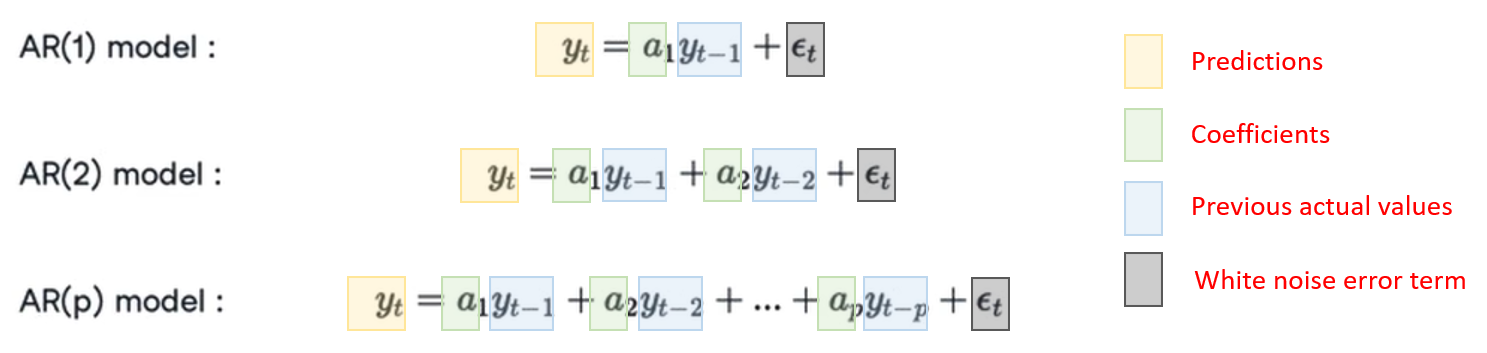

### MA(q): Moving Average

Moving Average (MA) models are another essential component of time series analysis, alongside Autoregressive (AR) models. MA models, like AR models, are used to model and forecast time series data. While AR models focus on the relationship between past values of the time series, MA models focus on modeling the relationship between past forecast errors (also called residuals) and the current value of the time series.

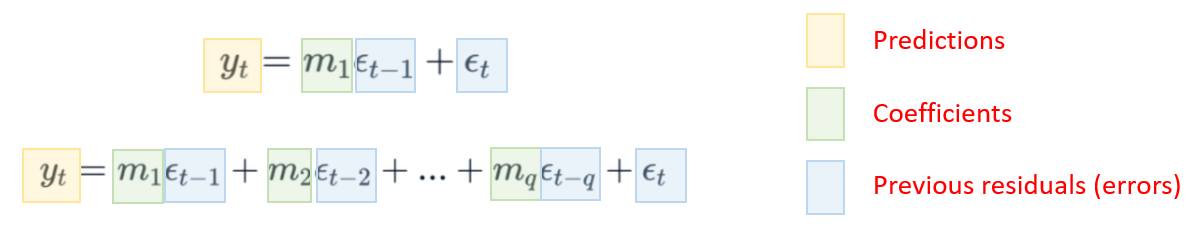

### ARMA(p, q) = AR(p) + MA(q)

The ARMA model, which stands for Autoregressive Moving Average model, combines both autoregressive (AR) and moving average (MA) components to capture the dependencies and patterns present in time series data. It's a versatile and widely used model in time series analysis and forecasting.

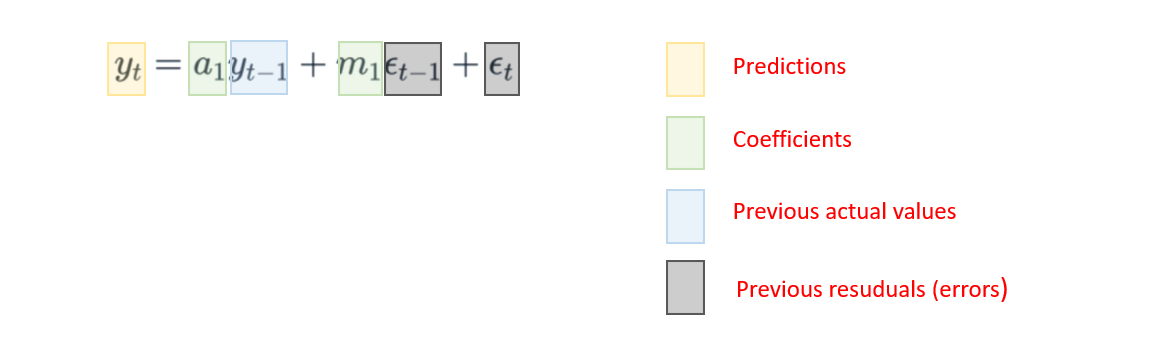

### ARIMA(p, d, q): Autoregressive Integrated Moving Average

The Autoregressive Integrated Moving Average (ARIMA) model is a powerful and widely used time series forecasting method that combines three key components: autoregressive (AR), differencing (I for Integrated), and moving average (MA). It's denoted as ARIMA(p, d, q), where each component serves a specific purpose:

1. Autoregressive (AR) Component (p): This part of the model captures the relationship between the current value of the time series and its past values. The "p" represents the order of the autoregressive component, indicating the number of past values used to predict the current value. The AR component is similar to the AR(p) model discussed earlier.

2. Differencing (I for Integrated) Component (d): The differencing component represents the number of times the data needs to be differenced to make it stationary. Stationarity means that the mean, variance, and autocorrelation structure of the time series do not change over time. Differencing involves subtracting the current value from a lagged value to remove trends and make the data stationary. The "d" parameter specifies the order of differencing required.

3. Moving Average (MA) Component (q): This part of the model captures the relationship between the current value of the time series and past forecast errors (residuals). The "q" represents the order of the moving average component, indicating the number of past forecast errors used to predict the current value. The MA component is similar to the MA(q) model discussed earlier.

### Modelling data with ARIMA model

In [ ]:
# Create ARIMA model
arima_model = sm.tsa.arima.ARIMA(train, order=(1, 1, 1)).fit()

In [ ]:
# Get model summary
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  478
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -575.768
Date:                Thu, 07 Sep 2023   AIC                           1157.537
Time:                        14:17:04   BIC                           1170.039
Sample:                    03-01-1958   HQIC                          1162.452
                         - 12-01-1997                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5669      0.054     10.586      0.000       0.462       0.672
ma.L1          0.3284      0.062      5.306      0.000       0.207       0.450
sigma2         0.6534      0.050     12.965      0.000       0.555       0.752
===================================================================================
Ljung-Box (L1) (Q):                   2.26   Jarque-Bera (JB):                 3.96
Prob(Q):                              0.13   Prob(JB):                         0.14
Heteroskedasticity (H):               0.98   Skew:                             0.09
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Make prediction with ARIMA model
y_pred_arima = arima_model.forecast(len(test))
y_pred_arima

1998-01-01    365.558639
1998-02-01    366.300479
1998-03-01    366.721013
1998-04-01    366.959404
1998-05-01    367.094543
1998-06-01    367.171151
1998-07-01    367.214578
1998-08-01    367.239196
1998-09-01    367.253152
1998-10-01    367.261063
1998-11-01    367.265547
1998-12-01    367.268090
1999-01-01    367.269531
1999-02-01    367.270348
1999-03-01    367.270811
1999-04-01    367.271073
1999-05-01    367.271222
1999-06-01    367.271307
1999-07-01    367.271354
1999-08-01    367.271381
1999-09-01    367.271397
1999-10-01    367.271406
1999-11-01    367.271410
1999-12-01    367.271413
2000-01-01    367.271415
2000-02-01    367.271416
2000-03-01    367.271416
2000-04-01    367.271417
2000-05-01    367.271417
2000-06-01    367.271417
2000-07-01    367.271417
2000-08-01    367.271417
2000-09-01    367.271417
2000-10-01    367.271417
2000-11-01    367.271417
2000-12-01    367.271417
2001-01-01    367.271417
2001-02-01    367.271417
2001-03-01    367.271417
2001-04-01    367.271417


In [ ]:
# Calculate the mean absolute error of arima model
arima_mae = mean_absolute_error(y_true=test,
                                y_pred=y_pred_arima)
arima_mae

2.2979307844802377

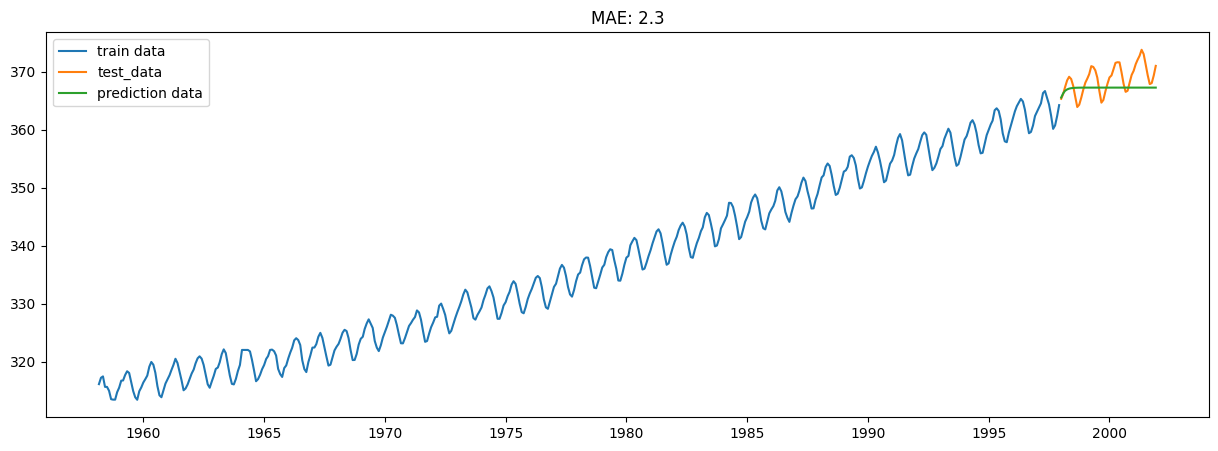

In [ ]:
# Plot the predictions
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_arima,
                 mae=arima_mae)

In [ ]:
# Create tuples for p, d, q
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

# Check out the first 10 tupple
pdq[0:10]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 0),
 (0, 2, 1)]

In [ ]:
# Create a function for arima model optimization
def arima_optimizer_aic(tarin, orders):
  best_aic, best_params = float('inf'), None
  for i in orders:
    try:
      arima_model_result = sm.tsa.arima.ARIMA(train, order=i).fit()
      aic = arima_model_result.aic
      if aic < best_aic:
        best_aic, best_params = aic, i
      print('ARIMA%s AIC=%.2f' % (i, aic))
    except:
      continue
  print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
  return best_params

In [ ]:
# Hyperparameter optimization for arima model
best_params_aic = arima_optimizer_aic(train, pdq)

ARIMA(0, 0, 0) AIC=3954.01
ARIMA(0, 0, 1) AIC=3312.73
ARIMA(0, 0, 2) AIC=2771.31
ARIMA(0, 0, 3) AIC=2328.74
ARIMA(0, 1, 0) AIC=1523.91
ARIMA(0, 1, 1) AIC=1254.79
ARIMA(0, 1, 2) AIC=1137.97
ARIMA(0, 1, 3) AIC=1094.51
ARIMA(0, 2, 0) AIC=1279.81
ARIMA(0, 2, 1) AIC=1257.89
ARIMA(0, 2, 2) AIC=1247.74
ARIMA(0, 2, 3) AIC=1141.50
ARIMA(0, 3, 0) AIC=1482.91
ARIMA(0, 3, 1) AIC=1286.29
ARIMA(0, 3, 2) AIC=1264.05
ARIMA(0, 3, 3) AIC=1253.48
ARIMA(1, 0, 0) AIC=1536.61
ARIMA(1, 0, 1) AIC=1267.22
ARIMA(1, 0, 2) AIC=1149.98
ARIMA(1, 0, 3) AIC=1105.72
ARIMA(1, 1, 0) AIC=1207.78
ARIMA(1, 1, 1) AIC=1157.54
ARIMA(1, 1, 2) AIC=1113.98
ARIMA(1, 1, 3) AIC=1095.90
ARIMA(1, 2, 0) AIC=1256.05
ARIMA(1, 2, 1) AIC=1257.80
ARIMA(1, 2, 2) AIC=1161.11
ARIMA(1, 2, 3) AIC=1117.55
ARIMA(1, 3, 0) AIC=1418.84
ARIMA(1, 3, 1) AIC=1262.07
ARIMA(1, 3, 2) AIC=1263.83
ARIMA(1, 3, 3) AIC=1253.50
ARIMA(2, 0, 0) AIC=1217.86
ARIMA(2, 0, 1) AIC=1168.38
ARIMA(2, 0, 2) AIC=1124.96
ARIMA(2, 0, 3) AIC=1106.92
ARIMA(2, 1, 0) AIC=1103.53
A

In [ ]:
# Create the final model
final_arima_model = sm.tsa.arima.ARIMA(train, order=best_params_aic).fit()

In [ ]:
# Make predictions with final arima model
y_pred_final_arima = final_arima_model.forecast(len(test))
y_pred_final_arima

1998-01-01    365.509027
1998-02-01    366.312647
1998-03-01    366.730676
1998-04-01    366.661113
1998-05-01    366.133883
1998-06-01    365.299793
1998-07-01    364.387628
1998-08-01    363.641545
1998-09-01    363.255846
1998-10-01    363.324536
1998-11-01    363.818701
1998-12-01    364.597075
1999-01-01    365.446204
1999-02-01    366.138851
1999-03-01    366.494683
1999-04-01    366.427075
1999-05-01    365.963929
1999-06-01    365.237568
1999-07-01    364.447134
1999-08-01    363.804115
1999-09-01    363.475874
1999-10-01    363.542221
1999-11-01    363.976268
1999-12-01    364.654076
2000-01-01    365.389858
2000-02-01    365.986787
2000-03-01    366.289544
2000-04-01    366.224605
2000-05-01    365.817853
2000-06-01    365.185368
2000-07-01    364.500473
2000-08-01    363.946346
2000-09-01    363.667126
2000-10-01    363.730536
2000-11-01    364.111687
2000-12-01    364.701866
2001-01-01    365.339380
2001-02-01    365.853758
2001-03-01    366.111242
2001-04-01    366.049459


In [ ]:
# Calculate the mean absolute error
final_arima_mae = mean_absolute_error(y_true=test,
                                      y_pred=y_pred_final_arima)
final_arima_mae

3.8098402644307043

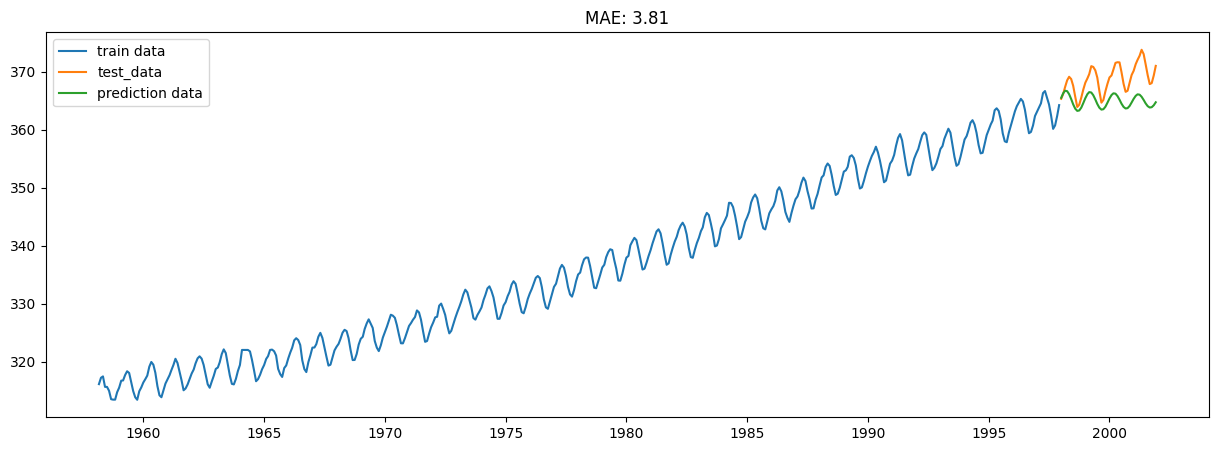

In [ ]:
# Plot the predictions
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_final_arima,
                 mae=final_arima_mae)

### SARIMA (p, d, q)(P,D,Q)m: Seasonal Autoregressive Integrated Moving Average

SARIMA is an extension of the ARIMA (AutoRegressive Integrated Moving Average) model, but it also takes into account seasonality in the data.

`SARIMA = ARIMA + Seasonality`

In [ ]:
# Create SARIMA model
sarima_model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(0, 0, 0, 12)).fit()

# order = (p=1, d=0, q=1)
# seasonal_order = (P=0, D=0, Q=0, m=12)  (m indicates the period. our data is montly da)

In [ ]:
# Make prediction with SARIMA model
y_pred_sarima = sarima_model.get_forecast(len(test))
y_pred_sarima = y_pred_sarima.predicted_mean
y_pred_sarima

1998-01-01    365.160364
1998-02-01    365.156968
1998-03-01    365.153572
1998-04-01    365.150175
1998-05-01    365.146779
1998-06-01    365.143383
1998-07-01    365.139987
1998-08-01    365.136591
1998-09-01    365.133195
1998-10-01    365.129799
1998-11-01    365.126403
1998-12-01    365.123007
1999-01-01    365.119611
1999-02-01    365.116215
1999-03-01    365.112819
1999-04-01    365.109423
1999-05-01    365.106028
1999-06-01    365.102632
1999-07-01    365.099236
1999-08-01    365.095840
1999-09-01    365.092445
1999-10-01    365.089049
1999-11-01    365.085653
1999-12-01    365.082258
2000-01-01    365.078862
2000-02-01    365.075467
2000-03-01    365.072071
2000-04-01    365.068676
2000-05-01    365.065280
2000-06-01    365.061885
2000-07-01    365.058490
2000-08-01    365.055094
2000-09-01    365.051699
2000-10-01    365.048304
2000-11-01    365.044909
2000-12-01    365.041513
2001-01-01    365.038118
2001-02-01    365.034723
2001-03-01    365.031328
2001-04-01    365.027933


In [ ]:
# Calculate the mean absolute error
sarima_mean = mean_absolute_error(y_true=test,
                                  y_pred=y_pred_sarima)
sarima_mean

3.784350973848157

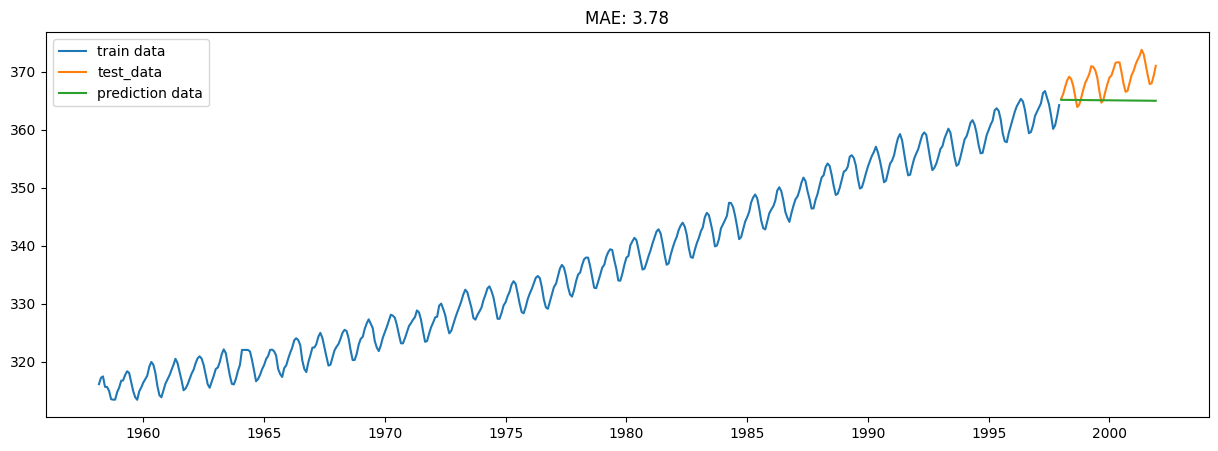

In [ ]:
# Plot the prediction
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_sarima,
                 mae=sarima_mean)

In [ ]:
# Create tuples for hyperparameters optimization
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # 12 montly

In [ ]:
# Create a function for hyperparameter optimization
def sarima_optimizer_mae(train, pdq, seasonal_pdq, step=48):
    best_mae, best_order, best_seasonal_order = float("inf"), float("inf"), None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit()
                y_pred_test = sarima_model.get_forecast(steps=step)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)
                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print('SARIMA{}x{}12 - MAE:{}'.format(param, param_seasonal, mae))
            except:
                continue
    print('SARIMA{}x{}12 - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order

In [ ]:
# Find the best parameters
best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq, step=len(test))

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MAE:368.7634375
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MAE:324.1790915674037
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MAE:5.063020833333329
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MAE:4.803324373445775
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MAE:5.073953469325261
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MAE:4.948440998374186
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MAE:3.3237251359415474
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:1.5279699618019482
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MAE:364.9178691427644
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MAE:320.4050600356536
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MAE:4.985339500537425
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MAE:4.76530515125738
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MAE:4.911204561675394
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MAE:368.7634375
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - MAE:3.674145484917735
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MAE:1.5666871609630053
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MAE:4.526979166666664
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MAE:3.9315401446376206
S

In [ ]:
# Create final model with best parameters
final_sarimax_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order).fit()

In [ ]:
# Make prediction with final model
y_pred_final_sarimax = final_sarimax_model.get_forecast(len(test))
y_pred_final_sarimax = y_pred_final_sarimax.predicted_mean
y_pred_final_sarimax

1998-01-01    365.257479
1998-02-01    366.186595
1998-03-01    366.961153
1998-04-01    368.222389
1998-05-01    368.698293
1998-06-01    367.833613
1998-07-01    366.597037
1998-08-01    364.574567
1998-09-01    362.439205
1998-10-01    362.871284
1998-11-01    364.270673
1998-12-01    366.035442
1999-01-01    366.927625
1999-02-01    367.776534
1999-03-01    368.510989
1999-04-01    369.997806
1999-05-01    370.419570
1999-06-01    369.402498
1999-07-01    368.227079
1999-08-01    366.252734
1999-09-01    364.039171
1999-10-01    364.546443
1999-11-01    366.049097
1999-12-01    367.860987
2000-01-01    368.804798
2000-02-01    369.689624
2000-03-01    370.442036
2000-04-01    371.827840
2000-05-01    372.273847
2000-06-01    371.325015
2000-07-01    370.122211
2000-08-01    368.126316
2000-09-01    365.947770
2000-10-01    366.421372
2000-11-01    367.877784
2000-12-01    369.668575
2001-01-01    370.589267
2001-02-01    371.458010
2001-03-01    372.202381
2001-04-01    373.633418


In [ ]:
# Calculate mean absolute error for final sarimax model
final_sarimax_mae = mean_absolute_error(y_true=test,
                                        y_pred=y_pred_final_sarimax)
final_sarimax_mae

0.5343572489022771

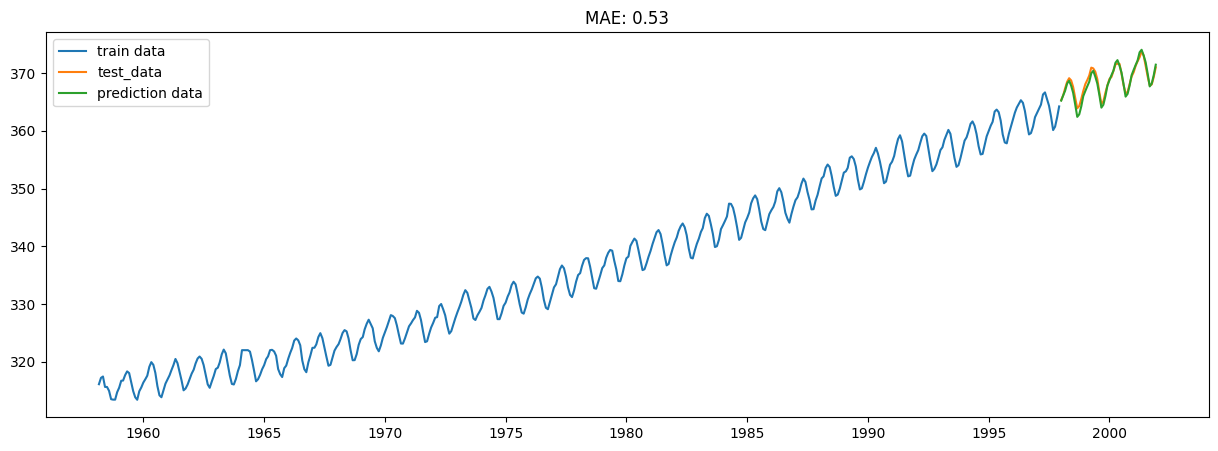

In [ ]:
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_final_sarimax,
                 mae=final_sarimax_mae)

Until now, we discovered a series of model and their detail. But the most importatn question is that which model is best for my data. Here is the map for choice the best model for our data type:

<br>
<br>

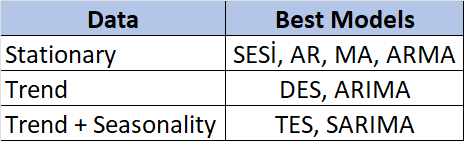

### Final model

Now, it is time to make a real prediction.. In the before section, we divide our data into train and test dataset. We trained our models on the training data and evaluate their performans with the test data. Just imagine that in this case we decided that the best model for our data is SARIMA. And our boss asking us to about the next month CO2 prediction. What will we do?

We will create a final model with whole dataset and make prediction about the next month. In the time series analysis, final model should be train on the whole dataset becuse of its time dependency.

In [ ]:
# Check our data again
y

,co2
1958-03-01,316.100000
1958-04-01,317.200000
1958-05-01,317.433333
1958-06-01,315.625000
1958-07-01,315.625000
...,...
2001-08-01,369.425000
2001-09-01,367.880000
2001-10-01,368.050000
2001-11-01,369.375000


As you see the above, the last date is '2001-12-01' and we want to make a prediction about next month (2022-01-01). We know the best parameters for our model. Why souldn't we train our model on the whole dataset and make better prediction? Let's do that..

In [ ]:
# Final model training on the whole dataset
model = SARIMAX(y, order=best_order, seasonal_order=best_seasonal_order).fit()

In [ ]:
# Prediction of next month
next_month_prediction = model.get_forecast(1).predicted_mean
next_month_prediction

2002-01-01    371.93053
Freq: MS, dtype: float64

In [ ]:
# Or predictions of next 6 month
next_6_months_prediction = model.get_forecast(6).predicted_mean
next_6_months_prediction

2002-01-01    371.930530
2002-02-01    372.718072
2002-03-01    373.585289
2002-04-01    374.494056
2002-05-01    375.101888
2002-06-01    374.687872
Freq: MS, Name: predicted_mean, dtype: float64

## Case Study: Airline Passenger Forecasting

In [ ]:
# Read dataset
df = pd.read_csv('airline-passengers.csv', index_col='month', parse_dates=True)
df

,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


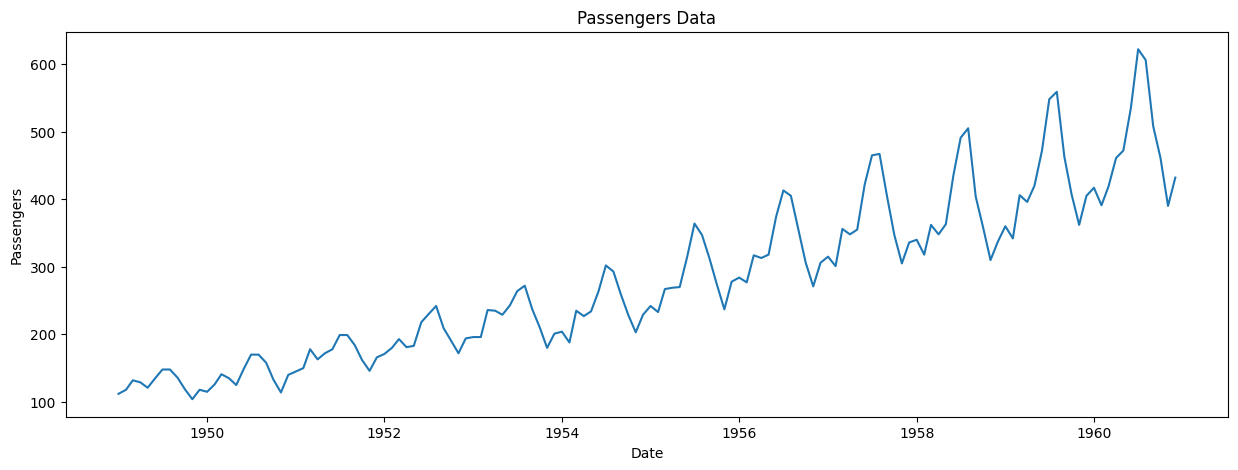

In [ ]:
# Plot the data
plt.figure(figsize=(15, 5))
plt.title('Passengers Data')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(df[['total_passengers']]);

In [ ]:
# Our data frequency is monthly. So lets assign it to data
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='month', length=144, freq='MS')

In [ ]:
# Split data into train and test data
train = df[:120]
test = df[120:]

### Single Exponential Smoothing (SES)

In [ ]:
# Create an array for finding best parameters
alphas = np.arange(0.01, 1, 0.1)
alphas

array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])

In [ ]:
# Find the best parameter
best_alpha, best_mae = ses_optimizer(train=train,
                                     alphas=alphas,
                                     len_forecast=len(test))

alpha: 0.01 mae: 225.5863
alpha: 0.11 mae: 82.528
alpha: 0.21 mae: 82.8979
alpha: 0.31 mae: 89.8377
alpha: 0.41 mae: 99.0585
alpha: 0.51 mae: 107.5558
alpha: 0.61 mae: 113.7514
alpha: 0.71 mae: 117.2224
alpha: 0.81 mae: 118.1776
alpha: 0.91 mae: 117.2438
best_alpha: 0.11 best_mae: 82.528


In [ ]:
# Create SES model with best alpha parameter and make predictions
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred_ses = ses_model.forecast(len(test))

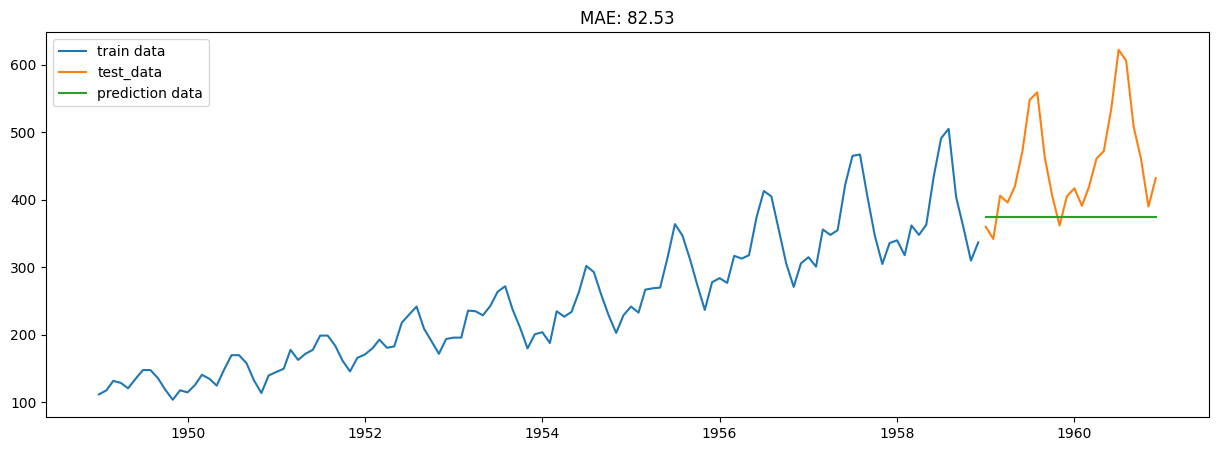

In [ ]:
# Plot the ses model's predictions
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_ses,
                 mae=best_mae)

### Double Exponential Smoothing (DES)

In [ ]:
# Create arrays for hyper parameter optimization
alphas = np.arange(0.01, 1, 0.1)
betas = np.arange(0.01, 1, 0.1)

alphas, betas

(array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]),
 array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]))

In [ ]:
# Find the best parameters for alpha and beta
best_alpha, best_beta, best_mae = des_optimizer(train,
                                                alphas,
                                                betas,
                                                len_forecast=len(test))

alpha: 0.01 beta: 0.01 mae: 54.9512
alpha: 0.01 beta: 0.11 mae: 54.1036
alpha: 0.01 beta: 0.21 mae: 55.5568
alpha: 0.01 beta: 0.31 mae: 57.3247
alpha: 0.01 beta: 0.41 mae: 57.7931
alpha: 0.01 beta: 0.51 mae: 57.9968
alpha: 0.01 beta: 0.61 mae: 57.9637
alpha: 0.01 beta: 0.71 mae: 57.5635
alpha: 0.01 beta: 0.81 mae: 57.3334
alpha: 0.01 beta: 0.91 mae: 57.8983
alpha: 0.11 beta: 0.01 mae: 55.0309
alpha: 0.11 beta: 0.11 mae: 58.4728
alpha: 0.11 beta: 0.21 mae: 69.6339
alpha: 0.11 beta: 0.31 mae: 72.555
alpha: 0.11 beta: 0.41 mae: 78.8168
alpha: 0.11 beta: 0.51 mae: 81.996
alpha: 0.11 beta: 0.61 mae: 77.2262
alpha: 0.11 beta: 0.71 mae: 71.5042
alpha: 0.11 beta: 0.81 mae: 69.0258
alpha: 0.11 beta: 0.91 mae: 67.8408
alpha: 0.21 beta: 0.01 mae: 57.1824
alpha: 0.21 beta: 0.11 mae: 74.992
alpha: 0.21 beta: 0.21 mae: 95.9492
alpha: 0.21 beta: 0.31 mae: 115.3164
alpha: 0.21 beta: 0.41 mae: 139.4303
alpha: 0.21 beta: 0.51 mae: 178.3759
alpha: 0.21 beta: 0.61 mae: 243.4543
alpha: 0.21 beta: 0.71 mae:

In [ ]:
# Create des model with best alpha and beta parameter
des_model = ExponentialSmoothing(train, trend='add').fit(smoothing_level=best_alpha,
                                                         smoothing_slope=best_beta)

# Make prediction with des model
y_pred_des = des_model.forecast(len(test))
y_pred_des

1959-01-01    398.289117
1959-02-01    401.212526
1959-03-01    404.135935
1959-04-01    407.059345
1959-05-01    409.982754
1959-06-01    412.906163
1959-07-01    415.829573
1959-08-01    418.752982
1959-09-01    421.676392
1959-10-01    424.599801
1959-11-01    427.523210
1959-12-01    430.446620
1960-01-01    433.370029
1960-02-01    436.293439
1960-03-01    439.216848
1960-04-01    442.140257
1960-05-01    445.063667
1960-06-01    447.987076
1960-07-01    450.910486
1960-08-01    453.833895
1960-09-01    456.757304
1960-10-01    459.680714
1960-11-01    462.604123
1960-12-01    465.527533
Freq: MS, dtype: float64

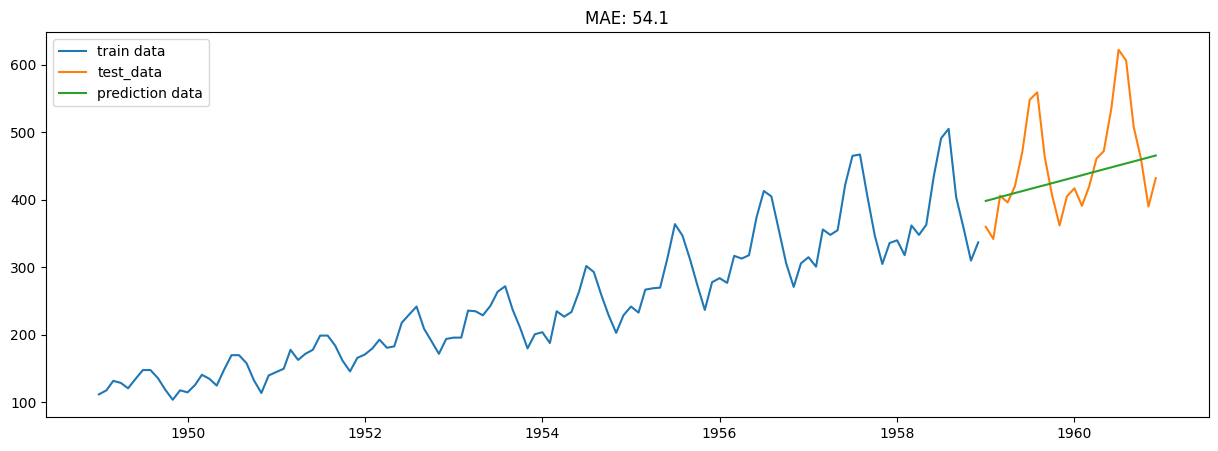

In [ ]:
# Plot the des predictions
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_des,
                 mae=best_mae)

### Trible Exponential Smoothing (TES)

In [ ]:
# Create arrays for hyperparameter optmizaiton
alphas = betas = gammas = np.arange(0.1, 1, 0.2)
abg = list(itertools.product(alphas, betas, gammas))

In [ ]:
# Find the best parameters for TES model
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg, len_forecast=len(test))

[0.1, 0.1, 0.1, 36.83]
[0.1, 0.1, 0.3, 34.88]
[0.1, 0.1, 0.5, 35.91]
[0.1, 0.1, 0.7, 38.72]
[0.1, 0.1, 0.9, 42.55]
[0.1, 0.3, 0.1, 53.96]
[0.1, 0.3, 0.3, 53.0]
[0.1, 0.3, 0.5, 56.98]
[0.1, 0.3, 0.7, 61.38]
[0.1, 0.3, 0.9, 67.17]
[0.1, 0.5, 0.1, 56.76]
[0.1, 0.5, 0.3, 51.72]
[0.1, 0.5, 0.5, 53.39]
[0.1, 0.5, 0.7, 60.08]
[0.1, 0.5, 0.9, 79.29]
[0.1, 0.7, 0.1, 34.04]
[0.1, 0.7, 0.3, 25.93]
[0.1, 0.7, 0.5, 27.81]
[0.1, 0.7, 0.7, 27.91]
[0.1, 0.7, 0.9, 38.32]
[0.1, 0.9, 0.1, 26.87]
[0.1, 0.9, 0.3, 25.32]
[0.1, 0.9, 0.5, 53.88]
[0.1, 0.9, 0.7, 38.38]
[0.1, 0.9, 0.9, 17.78]
[0.3, 0.1, 0.1, 54.54]
[0.3, 0.1, 0.3, 38.34]
[0.3, 0.1, 0.5, 31.57]
[0.3, 0.1, 0.7, 30.99]
[0.3, 0.1, 0.9, 29.23]
[0.3, 0.3, 0.1, 72.71]
[0.3, 0.3, 0.3, 22.6]
[0.3, 0.3, 0.5, 11.99]
[0.3, 0.3, 0.7, 17.11]
[0.3, 0.3, 0.9, 22.32]
[0.3, 0.5, 0.1, 132.33]
[0.3, 0.5, 0.3, 25.74]
[0.3, 0.5, 0.5, 17.3]
[0.3, 0.5, 0.7, 38.38]
[0.3, 0.5, 0.9, 56.82]
[0.3, 0.7, 0.1, 288.32]
[0.3, 0.7, 0.3, 134.86]
[0.3, 0.7, 0.5, 96.77]
[0.3, 0.7, 

In [ ]:
# Create a tes model with the best parameters and make predictions
tes_model = ExponentialSmoothing(train,
                                 trend='add',
                                 seasonal='add',
                                 seasonal_periods=12).fit(smoothing_level=best_alpha,
                                                          smoothing_slope=best_beta,
                                                          smoothing_seasonal=best_gamma)

y_pred_tes = tes_model.forecast(len(test))
y_pred_tes

1959-01-01    361.333660
1959-02-01    351.680528
1959-03-01    406.954223
1959-04-01    405.909073
1959-05-01    425.972769
1959-06-01    496.471704
1959-07-01    543.261264
1959-08-01    540.266316
1959-09-01    448.659771
1959-10-01    398.147314
1959-11-01    352.849194
1959-12-01    394.545253
1960-01-01    406.169482
1960-02-01    396.516350
1960-03-01    451.790044
1960-04-01    450.744894
1960-05-01    470.808591
1960-06-01    541.307525
1960-07-01    588.097085
1960-08-01    585.102137
1960-09-01    493.495592
1960-10-01    442.983135
1960-11-01    397.685015
1960-12-01    439.381075
Freq: MS, dtype: float64

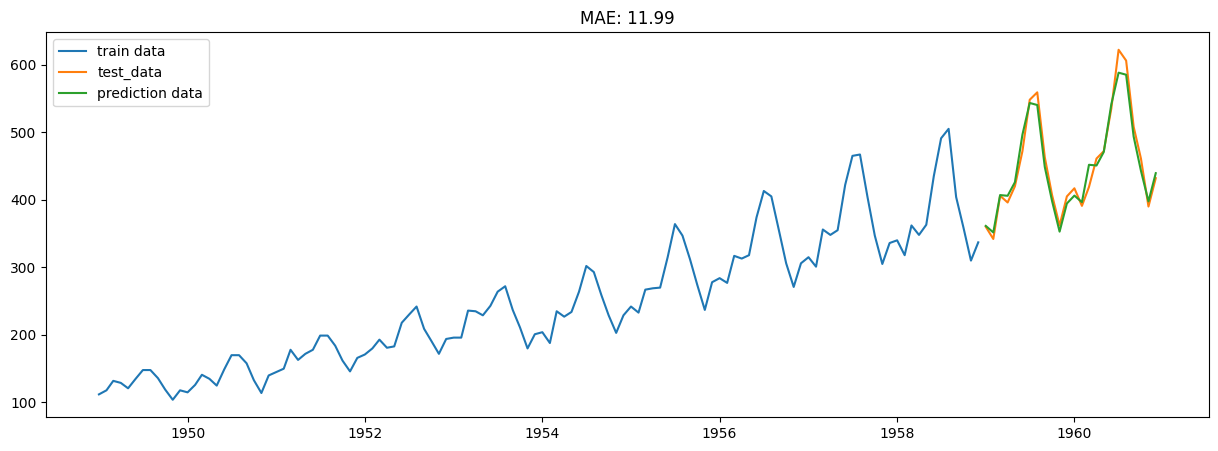

In [ ]:
# Plot tes model predictions
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_tes,
                 mae=best_mae)

### ARIMA Model

In [ ]:
# Create arrays for finding best parameter
p = d = q = np.arange(0, 4)
pdq = list(itertools.product(p, d, q))

In [ ]:
# Finding best parameters
best_params_aic = arima_optimizer_aic(train, pdq)

ARIMA(0, 0, 0) AIC=1436.33
ARIMA(0, 0, 1) AIC=1295.42
ARIMA(0, 0, 2) AIC=1229.22
ARIMA(0, 0, 3) AIC=1169.78
ARIMA(0, 1, 0) AIC=1138.81
ARIMA(0, 1, 1) AIC=1127.02
ARIMA(0, 1, 2) AIC=1126.97
ARIMA(0, 1, 3) AIC=1125.45
ARIMA(0, 2, 0) AIC=1171.65
ARIMA(0, 2, 1) AIC=1136.52
ARIMA(0, 2, 2) AIC=1124.36
ARIMA(0, 2, 3) AIC=1124.57
ARIMA(0, 3, 0) AIC=1263.95
ARIMA(0, 3, 1) AIC=1169.49
ARIMA(0, 3, 2) AIC=1140.39
ARIMA(0, 3, 3) AIC=1127.31
ARIMA(1, 0, 0) AIC=1152.40
ARIMA(1, 0, 1) AIC=1138.85
ARIMA(1, 0, 2) AIC=1140.24
ARIMA(1, 0, 3) AIC=1142.18
ARIMA(1, 1, 0) AIC=1130.66
ARIMA(1, 1, 1) AIC=1125.43
ARIMA(1, 1, 2) AIC=1118.10
ARIMA(1, 1, 3) AIC=1119.79
ARIMA(1, 2, 0) AIC=1168.21
ARIMA(1, 2, 1) AIC=1127.97
ARIMA(1, 2, 2) AIC=1122.89
ARIMA(1, 2, 3) AIC=1123.66
ARIMA(1, 3, 0) AIC=1232.81
ARIMA(1, 3, 1) AIC=1166.48
ARIMA(1, 3, 2) AIC=1170.58
ARIMA(1, 3, 3) AIC=1130.67
ARIMA(2, 0, 0) AIC=1141.99
ARIMA(2, 0, 1) AIC=1138.37
ARIMA(2, 0, 2) AIC=1138.68
ARIMA(2, 0, 3) AIC=1135.89
ARIMA(2, 1, 0) AIC=1126.84
A

In [ ]:
best_params_aic

(3, 1, 3)

In [ ]:
# Create the arima model with best parameters and make prediction
arima_model = sm.tsa.arima.ARIMA(train, order=best_params_aic).fit()
y_pred_arima = arima_model.forecast(len(test))
y_pred_arima

1959-01-01    362.910741
1959-02-01    351.905552
1959-03-01    384.229244
1959-04-01    388.934932
1959-05-01    413.964931
1959-06-01    414.414255
1959-07-01    421.769616
1959-08-01    410.584297
1959-09-01    403.785318
1959-10-01    388.232773
1959-11-01    380.096229
1959-12-01    371.576648
1960-01-01    371.941549
1960-02-01    374.478438
1960-03-01    382.781888
1960-04-01    390.623909
1960-05-01    398.914570
1960-06-01    403.337316
1960-07-01    404.982278
1960-08-01    402.361275
1960-09-01    397.696401
1960-10-01    391.497006
1960-11-01    386.156776
1960-12-01    382.354896
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
# Calculate mean absolute error
arima_mae = mean_absolute_error(y_true=test,
                                y_pred=y_pred_arima)
arima_mae

64.01225860494053

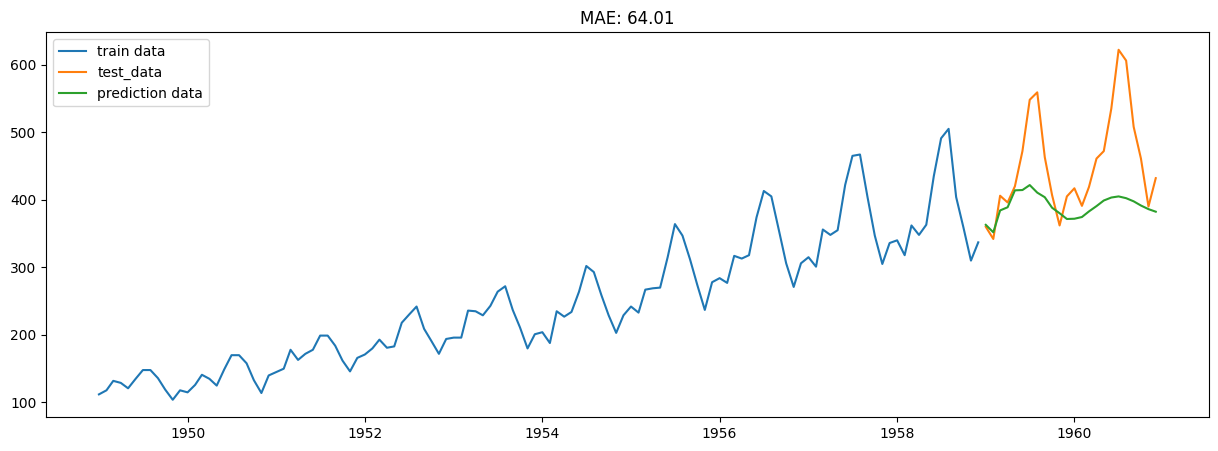

In [ ]:
# Plot the predictions
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_arima,
                 mae=arima_mae)

### SARIMA Model

In [ ]:
# Create arrays for hyperparameters optimization
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
# Find the best parameters
best_order, best_seasonal_order = sarima_optimizer_mae(train=train,
                                                       pdq=pdq,
                                                       seasonal_pdq=seasonal_pdq,
                                                       step=len(test))

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MAE:452.25
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MAE:367.2095457532533
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MAE:71.25
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MAE:72.62972633845074
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MAE:74.93604914677968
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MAE:76.79705573389303
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MAE:58.59973872393609
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:30.626157879495242
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MAE:442.6732363260292
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MAE:356.28978563277764
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MAE:70.49252847732824
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MAE:71.32051675444973
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MAE:75.48453207029132
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MAE:76.43298290267226
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - MAE:61.01388539909843
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MAE:31.74024174093716
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MAE:115.25
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MAE:119.36368436557336
SARIMA(0, 1, 0)x(0, 1, 

In [ ]:
# Check out the best parameters
best_order, best_seasonal_order

((0, 0, 0), (1, 1, 1, 12))

In [ ]:
# Create a model with the best params and make predictions
sarima_model = SARIMAX(train,
                       order=best_order,
                       seasonal_order=best_seasonal_order).fit()

y_pred_sarimax = sarima_model.get_forecast(len(test)).predicted_mean
y_pred_sarimax

1959-01-01    364.655916
1959-02-01    339.582079
1959-03-01    386.693239
1959-04-01    371.446292
1959-05-01    388.958011
1959-06-01    467.289568
1959-07-01    527.965349
1959-08-01    543.650668
1959-09-01    432.715862
1959-10-01    384.782285
1959-11-01    332.076465
1959-12-01    360.348010
1960-01-01    389.296264
1960-02-01    361.150532
1960-03-01    411.370889
1960-04-01    394.877781
1960-05-01    414.899634
1960-06-01    499.558749
1960-07-01    564.907360
1960-08-01    582.276933
1960-09-01    461.413594
1960-10-01    410.548291
1960-11-01    354.138991
1960-12-01    383.681278
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
# Calculate the mean absolute error
sarimax_mean = mean_absolute_error(y_true=test,
                                   y_pred=y_pred_sarimax)
sarimax_mean

30.626157879495242

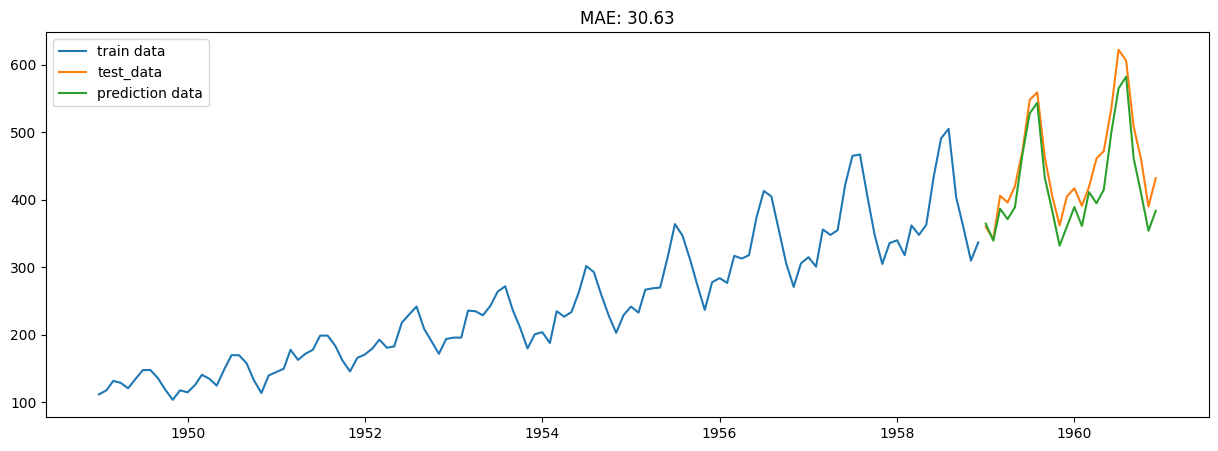

In [ ]:
# Plot predictions
plot_predictions(train_data=train,
                 test_data=test,
                 y_pred_data=y_pred_sarimax,
                 mae=sarimax_mean)

We tried 5 different model and the best model was TES. So, its time to create final model on the whole dataset and make forecasting for next months.

### Final Model


In [ ]:
# Create final model with whole dataset
final_model = ExponentialSmoothing(df, # training on whole dataset
                                   trend='add',
                                   seasonal='add',
                                   seasonal_periods=12).fit(smoothing_level=0.3, # best alpha for TES
                                                            smoothing_slope=0.3, # best beta for TES
                                                            smoothing_seasonal=0.5) # best gamma)

In [ ]:
# Make predictions for next 6 month
final_model.forecast(6)

1961-01-01    450.286329
1961-02-01    429.302012
1961-03-01    475.721701
1961-04-01    502.017545
1961-05-01    516.825544
1961-06-01    579.037151
Freq: MS, dtype: float64